# Preprocessing

## Imports

In [1]:
from IA.exploration_data.concat import *
from IA.exploration_data.preprocessing import *
from IA.exploration_data.data_viz import *
import pandas as pd

## Création des dataframes

Nous récupérons dans les différents dossiers contenant les coordonnées récupérées via le programme dataaquisition.py, les données, contenues dans des fichiers csv. Nous concaténons le tout, pour former deux dataframes : un contenant les données de permettant de faire avancer le robot, et un permettant de gérer la vitesse de déplacement du robot.

In [2]:
df_move, df_speed = find_all_from_directory()

In [39]:
df_move.shape

(941, 69)

In [40]:
df_speed.shape

(288, 69)

## Augmentation des données

L'augmentation des données est effectuée pour les deux datasets, il duplique chaque ligne avec une translation, un zoom et du bruit aléatoire.

In [3]:
data_augmentation_move_excluded = ["Unnamed: 0","id", "action"]
df_move_augmented = data_augmentation(df_move, exclude_columns=data_augmentation_move_excluded)

data_augmentation_speed_excluded = ["Unnamed: 0","id", "vitesse"]
df_speed_augmented = data_augmentation(df_speed, exclude_columns=data_augmentation_speed_excluded)

## Rapide observation des datasets

### Shapes

Nous avons augmenté la quantité de données par environ 4 pour les deux dataframes, ce qui permet de diversifier les données, et de limiter les risques d'overfitting.

In [4]:
df_move_augmented.shape

(3764, 69)

In [5]:
df_speed_augmented.shape

(1152, 69)

In [6]:
df_move_augmented.sample(10)

Unnamed: 0    NOSE_X    NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  \
810          810  0.468562  0.275698          0.484578          0.248162   
537          537  0.574295  0.225985          0.579228          0.207086   
2718         836  0.437535  0.275148          0.449124          0.260556   
1325         384  0.500971  0.384440          0.489551          0.374242   
919          919  0.431991  0.379183          0.441252          0.367711   
1307         366  0.588716  0.189833          0.580404          0.179653   
1312         371  0.595599  0.234783          0.583577          0.219267   
2055         173  0.484521  0.386682          0.492730          0.372544   
1151         210  0.552288  0.162088          0.540276          0.147595   
2227         345  0.503132  0.177679          0.509152          0.159348   

      LEFT_EYE_X  LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  \
810     0.493276    0.247955          0.498390          0.248225   
537     0.582868    0.207825          0.586280          0.208713   
2718    0.455323    0.261794          0.461272          0.263661   
1325    0.507633    0.378182          0.508897          0.365281   
919     0.445682    0.369217          0.449514          0.371074   
1307    0.600350    0.185210          0.603259          0.174136   
1312    0.602820    0.221775          0.604218          0.207485   
2055    0.497688    0.372974          0.501284          0.374075   
1151    0.560720    0.150729          0.563854          0.137071   
2227    0.513313    0.160183          0.517425          0.161072   

      RIGHT_EYE_INNER_X  ...  LEFT_HEEL_X  LEFT_HEEL_Y  RIGHT_HEEL_X  \
810            0.457812  ...     0.543026     1.347605      0.439658   
537            0.564382  ...     0.616446     1.152038      0.453759   
2718           0.430323  ...     0.460812     1.272374      0.361508   
1325           0.487955  ...     0.495404     1.102073      0.454264   
919            0.427290  ...     0.454489     1.130141      0.365468   
1307           0.577108  ...     0.617312     1.124317      0.490382   
1312           0.579925  ...     0.620875     1.062288      0.557437   
2055           0.477886  ...     0.501695     1.115377      0.457873   
1151           0.533900  ...     0.597032     1.175345      0.483441   
2227           0.493121  ...     0.431187     1.099255      0.401107   

      RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  RIGHT_FOOT_INDEX_X  \
810       1.350029           0.499286           1.408759            0.441051   
537       1.149238           0.691667           1.182992            0.512638   
2718      1.231955           0.442043           1.305749            0.375318   
1325      1.083250           0.492999           1.141902            0.448958   
919       1.100160           0.458311           1.163146            0.349390   
1307      1.137888           0.615940           1.165996            0.478982   
1312      1.064603           0.621059           1.105241            0.539327   
2055      1.079953           0.497957           1.164193            0.453975   
1151      1.145669           0.600924           1.216897            0.477722   
2227      1.150097           0.477611           1.149170            0.445828   

      RIGHT_FOOT_INDEX_Y  id          action  
810             1.403018   0  TOURNER_GAUCHE  
537             1.212323   7          NEUTRE  
2718            1.280970   2  TOURNER_GAUCHE  
1325            1.140813   6          GAUCHE  
919             1.131170   8  TOURNER_GAUCHE  
1307            1.188087   4          GAUCHE  
1312            1.114359   5          GAUCHE  
2055            1.138039   6           AVANT  
1151            1.204775  10           AVANT  
2227            1.210399   2          GAUCHE  

[10 rows x 69 columns]

In [7]:
df_move_augmented.describe()

Unnamed: 0       NOSE_X       NOSE_Y  LEFT_EYE_INNER_X  \
count  3764.00000  3764.000000  3764.000000       3764.000000   
mean    470.00000     0.514301     0.248849          0.519163   
std     271.67924     0.037990     0.066482          0.038300   
min       0.00000     0.368026     0.063132          0.366725   
25%     235.00000     0.487389     0.200397          0.493342   
50%     470.00000     0.519504     0.243894          0.524206   
75%     705.00000     0.541903     0.287291          0.546331   
max     940.00000     0.636345     0.459050          0.640606   

       LEFT_EYE_INNER_Y   LEFT_EYE_X   LEFT_EYE_Y  LEFT_EYE_OUTER_X  \
count       3764.000000  3764.000000  3764.000000       3764.000000   
mean           0.230861     0.528374     0.230926          0.530723   
std            0.067761     0.038213     0.067850          0.038529   
min            0.037538     0.381909     0.036060          0.384098   
25%            0.179635     0.501994     0.180497          0.504152   
50%            0.224233     0.532849     0.223834          0.534751   
75%            0.268702     0.556315     0.269107          0.558886   
max            0.449092     0.645987     0.453311          0.648891   

       LEFT_EYE_OUTER_Y  RIGHT_EYE_INNER_X  ...  RIGHT_ANKLE_Y  LEFT_HEEL_X  \
count       3764.000000        3764.000000  ...    3764.000000  3764.000000   
mean           0.229293           0.504144  ...       1.120207     0.554100   
std            0.067900           0.037788  ...       0.092256     0.043276   
min            0.033555           0.360567  ...       0.875550     0.426683   
25%            0.178171           0.477875  ...       1.071840     0.523289   
50%            0.222394           0.510428  ...       1.097067     0.562156   
75%            0.267022           0.531075  ...       1.142051     0.585342   
max            0.450590           0.623665  ...       1.389393     0.690714   

       LEFT_HEEL_Y  RIGHT_HEEL_X  RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  \
count  3764.000000   3764.000000   3764.000000        3764.000000   
mean      1.152072      0.461367      1.146408           0.556235   
std       0.097726      0.046333      0.095319           0.048578   
min       0.873846      0.329278      0.851541           0.435290   
25%       1.100404      0.426084      1.096594           0.516198   
50%       1.133642      0.469035      1.122474           0.570607   
75%       1.181876      0.492754      1.169502           0.589986   
max       1.429021      0.625941      1.432808           0.710014   

       LEFT_FOOT_INDEX_Y  RIGHT_FOOT_INDEX_X  RIGHT_FOOT_INDEX_Y           id  
count        3764.000000         3764.000000         3764.000000  3764.000000  
mean            1.197710            0.459042            1.199517     4.916047  
std             0.096100            0.044193            0.093019     3.035159  
min             0.939784            0.335182            0.931781     0.000000  
25%             1.143156            0.431052            1.146965     2.000000  
50%             1.178865            0.463019            1.175507     5.000000  
75%             1.227213            0.488842            1.221375     7.000000  
max             1.482267            0.603701            1.489060    10.000000  

[8 rows x 68 columns]

Pour l'instant, nous n'avons pas normalisé les données, qui sont donc exprimées en proportion par rapport à la longueur totale de l'image (ex, un point ayant 0,5 en x et en y est au milieu de l'image). Cela nous permet d'observer que certains points, comme ceux des mains, des coudes et des poignets semblent posséder une plus grande variabilité que les points du visage, ou des hanches (ce qui est cohérent avec le fait que le visage possède une moins grande amplitude qu'un poignet en terme de mouvement, et que nos positions tendent à garder le torse droit, ayant donc un alignement entre les épaules et les hanches).

In [8]:
df_speed_augmented.sample(10)

Unnamed: 0    NOSE_X    NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  \
1050         186  0.523805  0.273326          0.537303          0.257481   
304           16  0.495176  0.260722          0.506507          0.251316   
584            8  0.505994  0.245377          0.505936          0.231020   
255          255  0.590928  0.206188          0.600242          0.193946   
385           97  0.490623  0.286191          0.507270          0.275588   
178          178  0.542502  0.307212          0.552411          0.284701   
1074         210  0.581403  0.178442          0.593270          0.163292   
200          200  0.581454  0.233693          0.589613          0.223990   
681          105  0.531472  0.238694          0.540018          0.223935   
961           97  0.490591  0.286358          0.498352          0.269133   

      LEFT_EYE_X  LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  \
1050    0.544353    0.256716          0.548542          0.255821   
304     0.512432    0.244427          0.498510          0.246869   
584     0.509707    0.228600          0.514400          0.226562   
255     0.604523    0.197346          0.608207          0.200772   
385     0.513783    0.269035          0.500730          0.271935   
178     0.558227    0.284146          0.563170          0.283344   
1074    0.598888    0.163944          0.602655          0.164813   
200     0.593866    0.226265          0.598119          0.228944   
681     0.546479    0.223989          0.552199          0.224385   
961     0.504113    0.264659          0.508697          0.260524   

      RIGHT_EYE_INNER_X  ...  LEFT_HEEL_X  LEFT_HEEL_Y  RIGHT_HEEL_X  \
1050           0.514677  ...     0.590269     1.090507      0.487300   
304            0.483440  ...     0.588065     1.120997      0.517730   
584            0.492625  ...     0.581669     1.075327      0.514451   
255            0.584934  ...     0.601682     1.064144      0.553474   
385            0.485751  ...     0.581464     1.006567      0.494036   
178            0.533362  ...     0.573930     1.217814      0.493352   
1074           0.573341  ...     0.586342     1.126513      0.483202   
200            0.574674  ...     0.588772     1.089303      0.515938   
681            0.521640  ...     0.591156     1.086591      0.514134   
961            0.482403  ...     0.589022     1.005034      0.489399   

      RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  RIGHT_FOOT_INDEX_X  \
1050      1.037066           0.588449           1.139490            0.490494   
304       1.119779           0.580218           1.169106            0.492222   
584       1.079975           0.597237           1.121061            0.507055   
255       1.096300           0.610243           1.141145            0.539266   
385       1.062056           0.594567           1.109399            0.495529   
178       1.205705           0.575622           1.266892            0.494851   
1074      1.094218           0.602280           1.184290            0.485496   
200       1.099196           0.600021           1.139420            0.510090   
681       1.081297           0.591044           1.132340            0.507452   
961       1.052430           0.593772           1.106002            0.488894   

      RIGHT_FOOT_INDEX_Y  id  vitesse  
1050            1.100531  10    MOYEN  
304             1.159244   1     LENT  
584             1.133676   1     LENT  
255             1.153784   7   RAPIDE  
385             1.107894  10     LENT  
178             1.257927   9    MOYEN  
1074            1.152145   2   RAPIDE  
200             1.148409   1   RAPIDE  
681             1.128724   1    MOYEN  
961             1.111981  10     LENT  

[10 rows x 69 columns]

In [9]:
df_speed_augmented.describe()

Unnamed: 0       NOSE_X       NOSE_Y  LEFT_EYE_INNER_X  \
count  1152.000000  1152.000000  1152.000000       1152.000000   
mean    143.500000     0.526936     0.239540          0.538274   
std      83.174045     0.047788     0.065756          0.048817   
min       0.000000     0.239921     0.075940          0.285893   
25%      71.750000     0.499731     0.191304          0.506799   
50%     143.500000     0.527840     0.230035          0.540755   
75%     215.250000     0.566918     0.274060          0.578388   
max     287.000000     0.625534     0.544041          0.643265   

       LEFT_EYE_INNER_Y   LEFT_EYE_X   LEFT_EYE_Y  LEFT_EYE_OUTER_X  \
count       1152.000000  1152.000000  1152.000000       1152.000000   
mean           0.224134     0.544090     0.223024          0.544457   
std            0.066029     0.048320     0.065940          0.047672   
min            0.049139     0.312500     0.049899          0.324417   
25%            0.177315     0.512247     0.175327          0.511241   
50%            0.213893     0.547262     0.213450          0.548018   
75%            0.260842     0.583290     0.261107          0.583822   
max            0.453500     0.648081     0.442991          0.641407   

       LEFT_EYE_OUTER_Y  RIGHT_EYE_INNER_X  ...  RIGHT_ANKLE_Y  LEFT_HEEL_X  \
count       1152.000000        1152.000000  ...    1152.000000  1152.000000   
mean           0.224394           0.519189  ...       1.084495     0.574105   
std            0.066004           0.050056  ...       0.135003     0.037396   
min            0.050106           0.197851  ...       0.947872     0.437996   
25%            0.178708           0.489618  ...       1.048216     0.559871   
50%            0.214247           0.519289  ...       1.077243     0.585620   
75%            0.261688           0.560146  ...       1.102750     0.594012   
max            0.443037           0.622918  ...       3.272151     0.645528   

       LEFT_HEEL_Y  RIGHT_HEEL_X  RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  \
count  1152.000000   1152.000000   1152.000000        1152.000000   
mean      1.113902      0.488091      1.110318           0.579801   
std       0.139838      0.049604      0.139500           0.039153   
min       0.954145      0.188021      0.957904           0.447396   
25%       1.077469      0.472057      1.076546           0.568541   
50%       1.108517      0.493110      1.101428           0.589522   
75%       1.132938      0.513872      1.127744           0.606314   
max       3.377604      0.577805      3.387769           0.653649   

       LEFT_FOOT_INDEX_Y  RIGHT_FOOT_INDEX_X  RIGHT_FOOT_INDEX_Y           id  
count        1152.000000         1152.000000         1152.000000  1152.000000  
mean            1.170679            0.481523            1.162992     4.854167  
std             0.143870            0.047675            0.142544     3.183294  
min             1.042963            0.240485            1.058138     0.000000  
25%             1.133133            0.471711            1.125434     2.000000  
50%             1.160308            0.490274            1.151884     5.000000  
75%             1.189582            0.504135            1.175582     8.000000  
max             3.504886            0.575844            3.499207    10.000000  

[8 rows x 68 columns]

Les points ne semblent pas davantage variés par rapport au dataframe permettant d'entraîner sur les mouvements des bras, cependant il reste difficile de faire des conclusions sur les données sans séparer par classes.

## Remove unused columns

Les colonnes Unnamed, qui est juste un duplicat de l'index, et l'id des participants ne seront pas utiles pour la suite. Nous choisissons donc de les supprimer.

In [10]:
df_move_augmented.drop(["Unnamed: 0","id"], axis=1, inplace=True)
df_speed_augmented.drop(["Unnamed: 0","id"], axis=1, inplace=True)

In [11]:
df_move_augmented.head()

NOSE_X    NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  LEFT_EYE_X  \
0  0.490381  0.131185          0.498357          0.110118    0.504408   
1  0.494519  0.134019          0.502797          0.112299    0.509323   
2  0.489306  0.131105          0.498145          0.109810    0.502453   
3  0.483915  0.133162          0.494371          0.111272    0.499602   
4  0.483415  0.130110          0.493138          0.108554    0.498816   

   LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  RIGHT_EYE_INNER_X  \
0    0.111410          0.510745          0.113147           0.479757   
1    0.113562          0.515219          0.115073           0.484725   
2    0.111129          0.507798          0.112529           0.478851   
3    0.112255          0.504288          0.113465           0.474539   
4    0.109686          0.503691          0.110277           0.473574   

   RIGHT_EYE_INNER_Y  ...  RIGHT_ANKLE_Y  LEFT_HEEL_X  LEFT_HEEL_Y  \
0           0.107435  ...       1.092368     0.521792     1.122872   
1           0.109191  ...       1.100544     0.516726     1.128146   
2           0.107802  ...       1.094020     0.517282     1.125394   
3           0.110204  ...       1.088711     0.520803     1.122163   
4           0.107391  ...       1.099388     0.520713     1.132812   

   RIGHT_HEEL_X  RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  \
0      0.473666      1.123001           0.535662           1.172861   
1      0.469996      1.128887           0.538591           1.172091   
2      0.474969      1.124029           0.525588           1.179502   
3      0.473989      1.114834           0.536208           1.173508   
4      0.474742      1.129656           0.529765           1.186548   

   RIGHT_FOOT_INDEX_X  RIGHT_FOOT_INDEX_Y   action  
0            0.473977            1.175862  ARRIERE  
1            0.466096            1.179837  ARRIERE  
2            0.458975            1.173279  ARRIERE  
3            0.465018            1.168497  ARRIERE  
4            0.470125            1.179825  ARRIERE  

[5 rows x 67 columns]

## Looking for duplicates

Nous regardons s'il existe des lignes identiques dans nos jeux de données.

In [12]:
df_move_augmented[df_move_augmented.duplicated()]

Empty DataFrame
Columns: [NOSE_X, NOSE_Y, LEFT_EYE_INNER_X, LEFT_EYE_INNER_Y, LEFT_EYE_X, LEFT_EYE_Y, LEFT_EYE_OUTER_X, LEFT_EYE_OUTER_Y, RIGHT_EYE_INNER_X, RIGHT_EYE_INNER_Y, RIGHT_EYE_X, RIGHT_EYE_Y, RIGHT_EYE_OUTER_X, RIGHT_EYE_OUTER_Y, LEFT_EAR_X, LEFT_EAR_Y, RIGHT_EAR_X, RIGHT_EAR_Y, MOUTH_LEFT_X, MOUTH_LEFT_Y, MOUTH_RIGHT_X, MOUTH_RIGHT_Y, LEFT_SHOULDER_X, LEFT_SHOULDER_Y, RIGHT_SHOULDER_X, RIGHT_SHOULDER_Y, LEFT_ELBOW_X, LEFT_ELBOW_Y, RIGHT_ELBOW_X, RIGHT_ELBOW_Y, LEFT_WRIST_X, LEFT_WRIST_Y, RIGHT_WRIST_X, RIGHT_WRIST_Y, LEFT_PINKY_X, LEFT_PINKY_Y, RIGHT_PINKY_X, RIGHT_PINKY_Y, LEFT_INDEX_X, LEFT_INDEX_Y, RIGHT_INDEX_X, RIGHT_INDEX_Y, LEFT_THUMB_X, LEFT_THUMB_Y, RIGHT_THUMB_X, RIGHT_THUMB_Y, LEFT_HIP_X, LEFT_HIP_Y, RIGHT_HIP_X, RIGHT_HIP_Y, LEFT_KNEE_X, LEFT_KNEE_Y, RIGHT_KNEE_X, RIGHT_KNEE_Y, LEFT_ANKLE_X, LEFT_ANKLE_Y, RIGHT_ANKLE_X, RIGHT_ANKLE_Y, LEFT_HEEL_X, LEFT_HEEL_Y, RIGHT_HEEL_X, RIGHT_HEEL_Y, LEFT_FOOT_INDEX_X, LEFT_FOOT_INDEX_Y, RIGHT_FOOT_INDEX_X, RIGHT_FOOT_INDEX_Y, action]
Index: []

[0 rows x 67 columns]

In [13]:
df_speed_augmented[df_speed_augmented.duplicated()]

Empty DataFrame
Columns: [NOSE_X, NOSE_Y, LEFT_EYE_INNER_X, LEFT_EYE_INNER_Y, LEFT_EYE_X, LEFT_EYE_Y, LEFT_EYE_OUTER_X, LEFT_EYE_OUTER_Y, RIGHT_EYE_INNER_X, RIGHT_EYE_INNER_Y, RIGHT_EYE_X, RIGHT_EYE_Y, RIGHT_EYE_OUTER_X, RIGHT_EYE_OUTER_Y, LEFT_EAR_X, LEFT_EAR_Y, RIGHT_EAR_X, RIGHT_EAR_Y, MOUTH_LEFT_X, MOUTH_LEFT_Y, MOUTH_RIGHT_X, MOUTH_RIGHT_Y, LEFT_SHOULDER_X, LEFT_SHOULDER_Y, RIGHT_SHOULDER_X, RIGHT_SHOULDER_Y, LEFT_ELBOW_X, LEFT_ELBOW_Y, RIGHT_ELBOW_X, RIGHT_ELBOW_Y, LEFT_WRIST_X, LEFT_WRIST_Y, RIGHT_WRIST_X, RIGHT_WRIST_Y, LEFT_PINKY_X, LEFT_PINKY_Y, RIGHT_PINKY_X, RIGHT_PINKY_Y, LEFT_INDEX_X, LEFT_INDEX_Y, RIGHT_INDEX_X, RIGHT_INDEX_Y, LEFT_THUMB_X, LEFT_THUMB_Y, RIGHT_THUMB_X, RIGHT_THUMB_Y, LEFT_HIP_X, LEFT_HIP_Y, RIGHT_HIP_X, RIGHT_HIP_Y, LEFT_KNEE_X, LEFT_KNEE_Y, RIGHT_KNEE_X, RIGHT_KNEE_Y, LEFT_ANKLE_X, LEFT_ANKLE_Y, RIGHT_ANKLE_X, RIGHT_ANKLE_Y, LEFT_HEEL_X, LEFT_HEEL_Y, RIGHT_HEEL_X, RIGHT_HEEL_Y, LEFT_FOOT_INDEX_X, LEFT_FOOT_INDEX_Y, RIGHT_FOOT_INDEX_X, RIGHT_FOOT_INDEX_Y, vitesse]
Index: []

[0 rows x 67 columns]

Aucune ligne n'est identique à une autre dans nos deux jeux de données.

## Normalisation

La normalisation se fait en mesurant le segment entre le point de la hanche gauche, et de l'épaule gauche grâce à une distance euclidienne. Ce segment nous sert de référence. Le point de la hanche droite est ensuite utilisé pour calculer tous les autres points par rapport à lui, en divisant à chaque fois par le segment de référence.

Cela nous permet de normaliser par rapport à un point précis du corps, et de garder une certaine cohérence au sein des données d'une même ligne, qui proviennent donc du même individu.

La normalisation est effectué avant la sélection des colonnes, car certaines variables qui seront supprimées sont utilisées pour la normalisation.

In [14]:
df_move_normalize = normalize(df_move_augmented, "action")
df_move_normalize

NOSE_X    NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  LEFT_EYE_X  \
0    -0.150673 -1.364114         -0.127723         -1.424733   -0.110311   
1    -0.152516 -1.369399         -0.128428         -1.432604   -0.109437   
2    -0.150962 -1.348443         -0.125690         -1.409327   -0.113372   
3    -0.170960 -1.397257         -0.140341         -1.461363   -0.125021   
4    -0.167438 -1.382527         -0.138812         -1.445998   -0.122093   
...        ...       ...               ...               ...         ...   
3759 -0.125510 -1.341534         -0.088923         -1.398597   -0.073370   
3760 -0.126209 -1.365376         -0.085676         -1.424732   -0.072135   
3761 -0.128456 -1.378525         -0.091574         -1.441110   -0.074692   
3762 -0.136566 -1.369814         -0.099009         -1.432327   -0.082266   
3763 -0.121291 -1.380328         -0.085551         -1.443743   -0.064749   

      LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  RIGHT_EYE_INNER_X  \
0      -1.421016         -0.092078         -1.416016          -0.181242   
1      -1.428929         -0.092279         -1.424530          -0.181015   
2      -1.405556         -0.098090         -1.401552          -0.180853   
3      -1.458484         -0.111298         -1.454939          -0.198419   
4      -1.442664         -0.107739         -1.440923          -0.196415   
...          ...               ...               ...                ...   
3759   -1.409971         -0.087186         -1.392861          -0.145865   
3760   -1.435335         -0.081795         -1.416588          -0.144967   
3761   -1.454240         -0.081733         -1.437635          -0.147917   
3762   -1.445439         -0.089168         -1.429248          -0.156144   
3763   -1.456525         -0.076862         -1.439624          -0.140342   

      RIGHT_EYE_INNER_Y  ...  RIGHT_ANKLE_Y  LEFT_HEEL_X  LEFT_HEEL_Y  \
0             -1.432454  ...       1.401586    -0.060292     1.489360   
1             -1.441646  ...       1.443098    -0.087894     1.523415   
2             -1.415067  ...       1.404620    -0.070975     1.494322   
3             -1.464490  ...       1.401126    -0.062933     1.499092   
4             -1.449421  ...       1.471430    -0.057618     1.569843   
...                 ...  ...            ...          ...          ...   
3759          -1.408315  ...       1.405586     0.000368     1.525367   
3760          -1.437395  ...       1.385249    -0.012917     1.518171   
3761          -1.448561  ...       1.380351    -0.032215     1.495123   
3762          -1.439388  ...       1.338036    -0.027466     1.448536   
3763          -1.451618  ...       1.381539    -0.020789     1.518611   

      RIGHT_HEEL_X  RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  \
0        -0.198768      1.489728          -0.020381           1.813090   
1        -0.223874      1.525573          -0.024269           1.819155   
2        -0.191953      1.490419          -0.047226           1.822374   
3        -0.200029      1.477628          -0.017817           1.848554   
4        -0.192977      1.560550          -0.030964           1.902875   
...            ...           ...                ...                ...   
3759     -0.333005      1.482673          -0.051534           2.010182   
3760     -0.337156      1.456415          -0.062137           2.012074   
3761     -0.350587      1.456476          -0.066702           1.980258   
3762     -0.349480      1.413925          -0.045007           1.924845   
3763     -0.343084      1.458387          -0.050551           1.998070   

      RIGHT_FOOT_INDEX_X  RIGHT_FOOT_INDEX_Y          action  
0              -0.197873            1.821726         ARRIERE  
1              -0.235224            1.841696         ARRIERE  
2              -0.237680            1.804581         ARRIERE  
3              -0.226302            1.833879         ARRIERE  
4              -0.206569            1.883081         ARRIERE  
...                  ...                 ...      

Beaucoup de points semblent suivre une distribution normale, sauf au niveau des mains et des poignets, qui eux semblent suivre deux distributions gaussiennes, ce qui doit être dû à une partie de nos positions qui font que la main gauche se retrouve plutôt à droite, et inversement.

In [15]:
df_move_normalize.describe()

NOSE_X       NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  \
count  3764.000000  3764.000000       3764.000000       3764.000000   
mean     -0.140806    -1.334644         -0.126039         -1.389712   
std       0.060637     0.062082          0.062616          0.060364   
min      -0.421909    -1.577143         -0.460466         -1.630370   
25%      -0.171873    -1.378684         -0.160105         -1.434603   
50%      -0.147030    -1.336378         -0.128333         -1.390076   
75%      -0.112981    -1.292170         -0.095791         -1.346933   
max       0.576046    -1.045668          0.566479         -1.115127   

        LEFT_EYE_X   LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  \
count  3764.000000  3764.000000       3764.000000       3764.000000   
mean     -0.097361    -1.389448         -0.090273         -1.394580   
std       0.058639     0.060587          0.057952          0.061472   
min      -0.391764    -1.645660         -0.390456         -1.661553   
25%      -0.127010    -1.433297         -0.119540         -1.437804   
50%      -0.102112    -1.389299         -0.094437         -1.394128   
75%      -0.071031    -1.346243         -0.064399         -1.350185   
max       0.571187    -1.114965          0.559509         -1.124909   

       RIGHT_EYE_INNER_X  RIGHT_EYE_INNER_Y  ...  RIGHT_ANKLE_X  \
count        3764.000000        3764.000000  ...    3764.000000   
mean           -0.172195          -1.397495  ...      -0.309538   
std             0.061636           0.062695  ...       0.063130   
min            -0.460652          -1.672688  ...      -0.507869   
25%            -0.206355          -1.441589  ...      -0.350281   
50%            -0.177623          -1.396569  ...      -0.306881   
75%            -0.144299          -1.352785  ...      -0.272271   
max             0.533212          -1.112506  ...       0.369954   

       RIGHT_ANKLE_Y  LEFT_HEEL_X  LEFT_HEEL_Y  RIGHT_HEEL_X  RIGHT_HEEL_Y  \
count    3764.000000  3764.000000  3764.000000   3764.000000   3764.000000   
mean        1.355364    -0.019242     1.453798     -0.304218      1.435618   
std         0.133499     0.049810     0.147295      0.069114      0.139854   
min         0.868252    -0.288370     0.859296     -0.518384      0.762840   
25%         1.273447    -0.045513     1.359297     -0.348400      1.348373   
50%         1.359527    -0.016112     1.455906     -0.303985      1.434991   
75%         1.437292     0.008807     1.535467     -0.264029      1.520703   
max         1.713782     0.201110     1.843782      0.373705      1.808914   

       LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  RIGHT_FOOT_INDEX_X  \
count        3764.000000        3764.000000         3764.000000   
mean           -0.010636           1.978193           -0.312152   
std             0.069177           0.327754            0.076206   
min            -0.470185           1.305153           -0.567984   
25%            -0.058065           1.754431           -0.358288   
50%            -0.012555           1.891062           -0.311457   
75%             0.031983           2.141548           -0.258855   
max             0.351284           2.989409            0.402970   

       RIGHT_FOOT_INDEX_Y  
count         3764.000000  
mean             1.983978  
std              0.307023  
min              1.397444  
25%              1.766976  
50%              1.912494  
75%              2.153766  
max              2.954464  

[8 rows x 66 columns]

In [16]:
df_move_normalize["action"].value_counts()

action
TOURNER_GAUCHE    560
NEUTRE            536
SURPRISE          484
TOURNER_DROITE    460
AVANT             448
DROITE            440
ARRIERE           424
GAUCHE            412
Name: count, dtype: int64

Nous pouvons constater que les classes sont globalement assez équilibrées, avec malgré tout une prépondérances de mouvements neutres, et permettant de tourner à gauche.

In [17]:
df_speed_normalize = normalize(df_speed_augmented, "vitesse")
df_speed_normalize

NOSE_X    NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  LEFT_EYE_X  \
0    -0.202361 -1.444871         -0.195111         -1.494087   -0.179358   
1    -0.241749 -1.325906         -0.231092         -1.394046   -0.213810   
2    -0.233604 -1.408855         -0.212876         -1.465770   -0.193723   
3    -0.291241 -1.328161         -0.293264         -1.375493   -0.280119   
4    -0.337679 -1.358002         -0.336785         -1.377552   -0.323812   
...        ...       ...               ...               ...         ...   
1147 -0.080234 -1.428250         -0.034149         -1.462424   -0.014282   
1148 -0.098244 -1.467392         -0.055043         -1.501164   -0.035049   
1149 -0.057739 -1.415459         -0.004981         -1.430558    0.011848   
1150 -0.013011 -1.401499          0.036702         -1.423706    0.053368   
1151  0.025659 -1.362231          0.079089         -1.389846    0.095628   

      LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  RIGHT_EYE_INNER_X  \
0      -1.496129         -0.165003         -1.497266          -0.247285   
1      -1.398779         -0.197118         -1.403003          -0.279109   
2      -1.468139         -0.175907         -1.468910          -0.270430   
3      -1.385380         -0.266422         -1.394372          -0.331706   
4      -1.382343         -0.310620         -1.387296          -0.371442   
...          ...               ...               ...                ...   
1147   -1.457853         -0.001541         -1.452867          -0.093783   
1148   -1.497833         -0.020765         -1.493497          -0.114984   
1149   -1.420814          0.023460         -1.410031          -0.059774   
1150   -1.412950          0.064207         -1.401935          -0.017206   
1151   -1.378789          0.106570         -1.368567           0.022454   

      RIGHT_EYE_INNER_Y  ...  RIGHT_ANKLE_Y  LEFT_HEEL_X  LEFT_HEEL_Y  \
0             -1.477320  ...       1.261765     0.002903     1.374028   
1             -1.378130  ...       1.245840     0.008331     1.369170   
2             -1.454054  ...       1.243079    -0.002436     1.349427   
3             -1.338238  ...       1.226121     0.015650     1.321753   
4             -1.349098  ...       1.226598     0.007196     1.286261   
...                 ...  ...            ...          ...          ...   
1147          -1.489621  ...       1.270458     0.040830     1.377314   
1148          -1.518954  ...       1.240495     0.037004     1.354630   
1149          -1.471585  ...       1.244103     0.021905     1.362905   
1150          -1.464682  ...       1.241980     0.034474     1.384555   
1151          -1.436241  ...       1.053327     0.016594     1.318866   

      RIGHT_HEEL_X  RIGHT_HEEL_Y  LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  \
0        -0.225973      1.331214           0.010729           1.768462   
1        -0.232718      1.323312          -0.016060           1.784638   
2        -0.235361      1.318360          -0.021665           1.762932   
3        -0.231030      1.292379           0.006198           1.716105   
4        -0.218586      1.291495           0.022776           1.626883   
...            ...           ...                ...                ...   
1147     -0.305966      1.300741           0.054578           1.972669   
1148     -0.300433      1.264096           0.051436           1.949030   
1149     -0.309122      1.283784           0.036156           1.960771   
1150     -0.306130      1.226817           0.036079           2.017062   
1151     -0.273889      1.077282           0.016303           1.989749   

      RIGHT_FOOT_INDEX_X  RIGHT_FOOT_INDEX_Y  vitesse  
0              -0.266565            1.713586     LENT  
1              -0.299769            1.689541     LENT  
2              -0.296393            1.686420     LENT  
3              -0.265745            1.673127     LENT  
4              -0.238699            1.643800     LENT  
...                  ...                 ...      ...  
1147           -0.308997            

Puisque dans le cas des vitesses, c'est les mouvements de tête qui tendent à placer les différents points du visage soit plus à droite, soit plus à gauche. Les points du visages tendent donc à suivre, sans les distinguer par classes, deux distributions gaussiennes.

In [18]:
df_speed_normalize.describe()

NOSE_X       NOSE_Y  LEFT_EYE_INNER_X  LEFT_EYE_INNER_Y  \
count  1152.000000  1152.000000       1152.000000       1152.000000   
mean     -0.158528    -1.377350         -0.122276         -1.425407   
std       0.111048     0.072371          0.120692          0.064964   
min      -0.372040    -1.564477         -0.361383         -1.572410   
25%      -0.262922    -1.427517         -0.234981         -1.470730   
50%      -0.163597    -1.387200         -0.125655         -1.434321   
75%      -0.072533    -1.333768         -0.023396         -1.387183   
max       0.170316    -1.162581          0.213781         -1.211158   

        LEFT_EYE_X   LEFT_EYE_Y  LEFT_EYE_OUTER_X  LEFT_EYE_OUTER_Y  \
count  1152.000000  1152.000000       1152.000000       1152.000000   
mean     -0.103781    -1.428697         -0.102666         -1.424086   
std       0.120121     0.060016          0.119197          0.058382   
min      -0.349492    -1.562149         -0.363197         -1.556329   
25%      -0.213855    -1.469882         -0.209234         -1.465029   
50%      -0.104569    -1.437799         -0.099915         -1.431506   
75%      -0.006504    -1.393796         -0.008949         -1.384731   
max       0.228817    -1.235425          0.223396         -1.233274   

       RIGHT_EYE_INNER_X  RIGHT_EYE_INNER_Y  ...  RIGHT_ANKLE_X  \
count        1152.000000        1152.000000  ...    1152.000000   
mean           -0.182888          -1.432284  ...      -0.297793   
std             0.119815           0.078259  ...       0.040414   
min            -0.398383          -1.591408  ...      -0.453373   
25%            -0.295000          -1.491192  ...      -0.324755   
50%            -0.192112          -1.447508  ...      -0.296987   
75%            -0.088858          -1.379011  ...      -0.268669   
max             0.156510          -1.200395  ...      -0.181018   

       RIGHT_ANKLE_Y  LEFT_HEEL_X  LEFT_HEEL_Y  RIGHT_HEEL_X  RIGHT_HEEL_Y  \
count    1152.000000  1152.000000  1152.000000   1152.000000   1152.000000   
mean        1.315990    -0.010365     1.410012     -0.283306      1.397421   
std         0.145221     0.038554     0.154603      0.044994      0.148095   
min         0.884096    -0.175425     1.076196     -0.426394      1.028366   
25%         1.223928    -0.034238     1.297771     -0.319239      1.299550   
50%         1.291509    -0.009649     1.379871     -0.282819      1.370395   
75%         1.372800     0.016248     1.516681     -0.248857      1.456267   
max         1.769301     0.104314     1.860387     -0.162522      1.883946   

       LEFT_FOOT_INDEX_X  LEFT_FOOT_INDEX_Y  RIGHT_FOOT_INDEX_X  \
count        1152.000000        1152.000000         1152.000000   
mean            0.008092           1.891413           -0.305155   
std             0.043275           0.273741            0.048524   
min            -0.119544           1.320068           -0.491924   
25%            -0.021783           1.737888           -0.335033   
50%             0.011437           1.853446           -0.307790   
75%             0.040493           2.010047           -0.270791   
max             0.117048           3.100484           -0.163109   

       RIGHT_FOOT_INDEX_Y  
count         1152.000000  
mean             1.866107  
std              0.245657  
min              1.428947  
25%              1.694089  
50%              1.811123  
75%              2.000738  
max              3.096447  

[8 rows x 66 columns]

In [19]:
df_speed_normalize["vitesse"].value_counts()

vitesse
RAPIDE    396
LENT      392
MOYEN     364
Name: count, dtype: int64

Les classes semblent équilibrées entre les différentes classes de vitesse.

### Selection des colonnes (manuellement, par déduction)


In [20]:
df_speed_normalize.columns

Index(['NOSE_X', 'NOSE_Y', 'LEFT_EYE_INNER_X', 'LEFT_EYE_INNER_Y',
       'LEFT_EYE_X', 'LEFT_EYE_Y', 'LEFT_EYE_OUTER_X', 'LEFT_EYE_OUTER_Y',
       'RIGHT_EYE_INNER_X', 'RIGHT_EYE_INNER_Y', 'RIGHT_EYE_X', 'RIGHT_EYE_Y',
       'RIGHT_EYE_OUTER_X', 'RIGHT_EYE_OUTER_Y', 'LEFT_EAR_X', 'LEFT_EAR_Y',
       'RIGHT_EAR_X', 'RIGHT_EAR_Y', 'MOUTH_LEFT_X', 'MOUTH_LEFT_Y',
       'MOUTH_RIGHT_X', 'MOUTH_RIGHT_Y', 'LEFT_SHOULDER_X', 'LEFT_SHOULDER_Y',
       'RIGHT_SHOULDER_X', 'RIGHT_SHOULDER_Y', 'LEFT_ELBOW_X', 'LEFT_ELBOW_Y',
       'RIGHT_ELBOW_X', 'RIGHT_ELBOW_Y', 'LEFT_WRIST_X', 'LEFT_WRIST_Y',
       'RIGHT_WRIST_X', 'RIGHT_WRIST_Y', 'LEFT_PINKY_X', 'LEFT_PINKY_Y',
       'RIGHT_PINKY_X', 'RIGHT_PINKY_Y', 'LEFT_INDEX_X', 'LEFT_INDEX_Y',
       'RIGHT_INDEX_X', 'RIGHT_INDEX_Y', 'LEFT_THUMB_X', 'LEFT_THUMB_Y',
       'RIGHT_THUMB_X', 'RIGHT_THUMB_Y', 'LEFT_HIP_X', 'LEFT_HIP_Y',
       'RIGHT_HIP_X', 'RIGHT_HIP_Y', 'LEFT_KNEE_X', 'LEFT_KNEE_Y',
       'RIGHT_KNEE_X', 'RIGHT_KNEE_Y', 'LEFT_AN

Nous supprimons tous les points au niveau des jambes, qui ne nous servent pas vraiment, ainsi que les points au niveau des hanches. Pour le modèle de vitesse, nous ne gardons que les points des épaules, et du visage.

In [21]:
list_speed = [
    "NOSE_X", "NOSE_Y",
    "LEFT_EYE_INNER_X", "LEFT_EYE_INNER_Y",
    "LEFT_EYE_X", "LEFT_EYE_Y",
    "LEFT_EYE_OUTER_X", "LEFT_EYE_OUTER_Y",
    "RIGHT_EYE_INNER_X", "RIGHT_EYE_INNER_Y",
    "RIGHT_EYE_X", "RIGHT_EYE_Y",
    "RIGHT_EYE_OUTER_X", "RIGHT_EYE_OUTER_Y",
    "LEFT_EAR_X", "LEFT_EAR_Y",
    "RIGHT_EAR_X", "RIGHT_EAR_Y",
    "MOUTH_LEFT_X", "MOUTH_LEFT_Y",
    "MOUTH_RIGHT_X", "MOUTH_RIGHT_Y",
    "LEFT_SHOULDER_X", "LEFT_SHOULDER_Y",
    "RIGHT_SHOULDER_X", "RIGHT_SHOULDER_Y",
    "vitesse"
]

list_move = [
    "NOSE_X", "NOSE_Y",
    "LEFT_EAR_X", "LEFT_EAR_Y",
    "RIGHT_EAR_X", "RIGHT_EAR_Y",

    "LEFT_SHOULDER_X", "LEFT_SHOULDER_Y",
    "RIGHT_SHOULDER_X", "RIGHT_SHOULDER_Y",
    "LEFT_HIP_X", "LEFT_HIP_Y",
    "RIGHT_HIP_X", "RIGHT_HIP_Y",

    "LEFT_ELBOW_X", "LEFT_ELBOW_Y",
    "RIGHT_ELBOW_X", "RIGHT_ELBOW_Y",
    "LEFT_WRIST_X", "LEFT_WRIST_Y",
    "RIGHT_WRIST_X", "RIGHT_WRIST_Y",
    "LEFT_PINKY_X", "LEFT_PINKY_Y",
    "RIGHT_PINKY_X", "RIGHT_PINKY_Y",
    "LEFT_INDEX_X", "LEFT_INDEX_Y",
    "RIGHT_INDEX_X", "RIGHT_INDEX_Y",
    "LEFT_THUMB_X", "LEFT_THUMB_Y",
    "RIGHT_THUMB_X", "RIGHT_THUMB_Y",
    "action"
]

df_speed_normalize_filter = filter_columns(df_speed_normalize, *list_speed)
df_move_normalize_filter = filter_columns(df_move_normalize, *list_move)

In [22]:
df_speed_normalize_filter = filter_columns(df_speed_normalize, *list_speed)

## Data Visualisation

### Boxplots

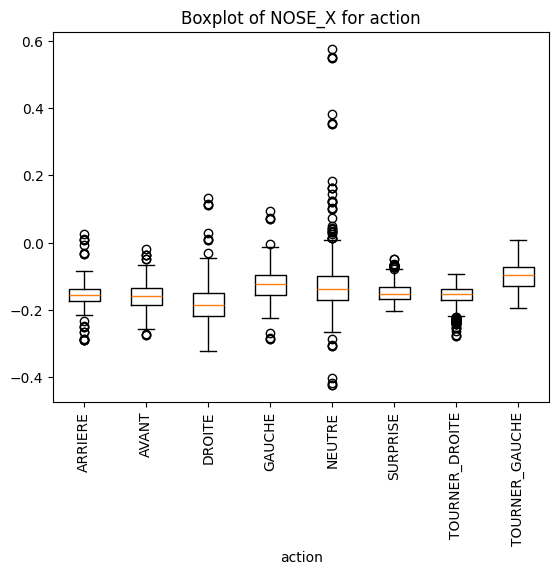

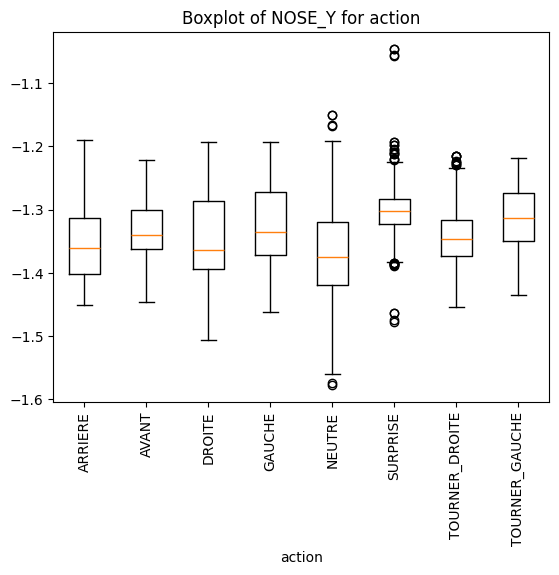

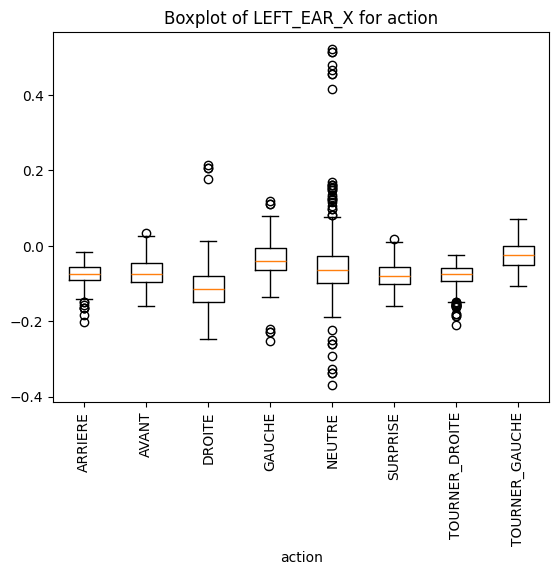

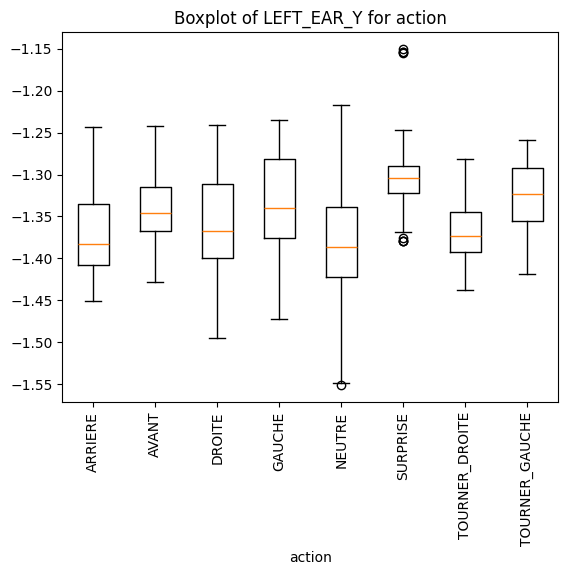

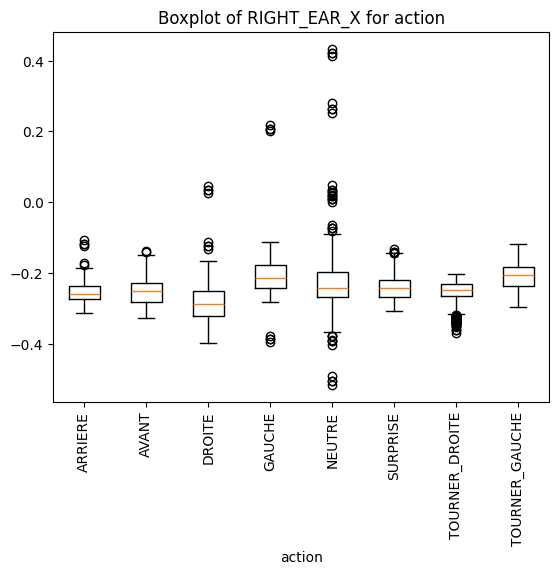

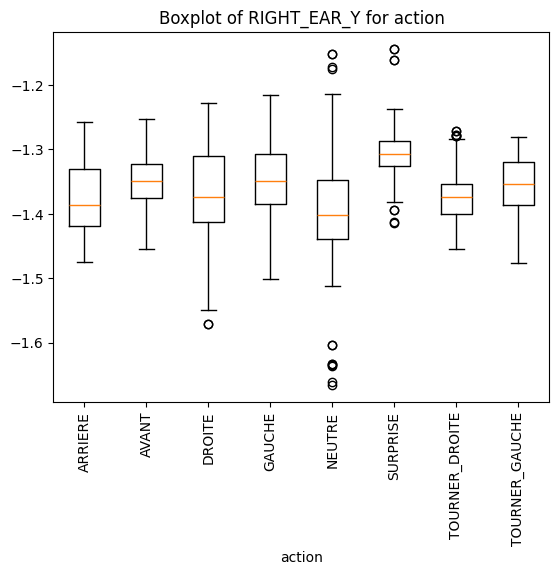

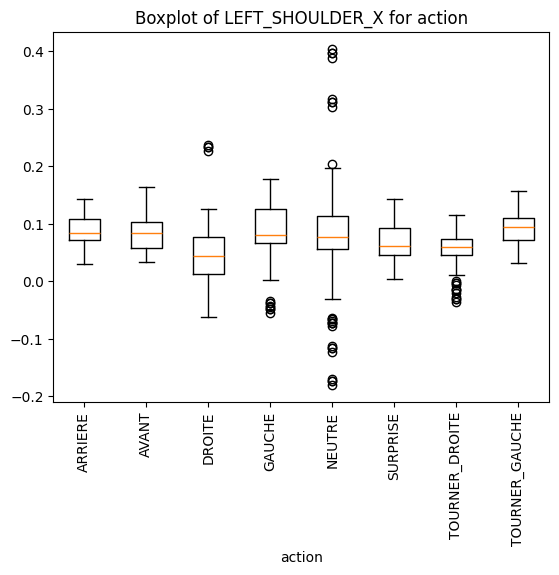

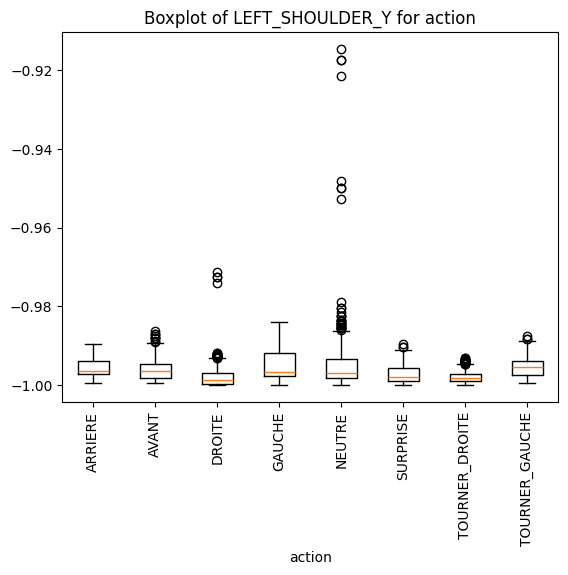

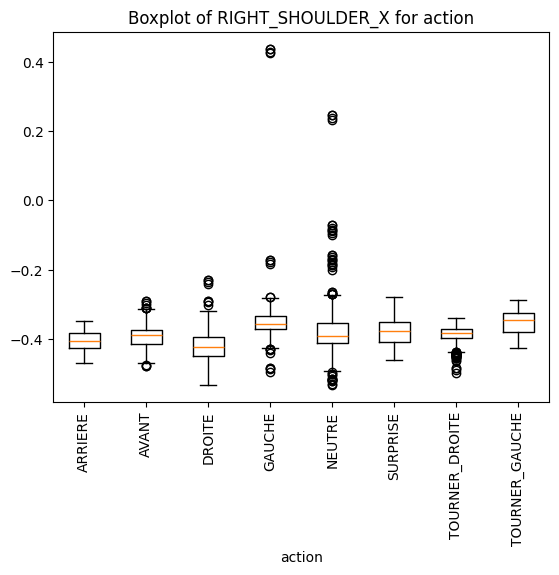

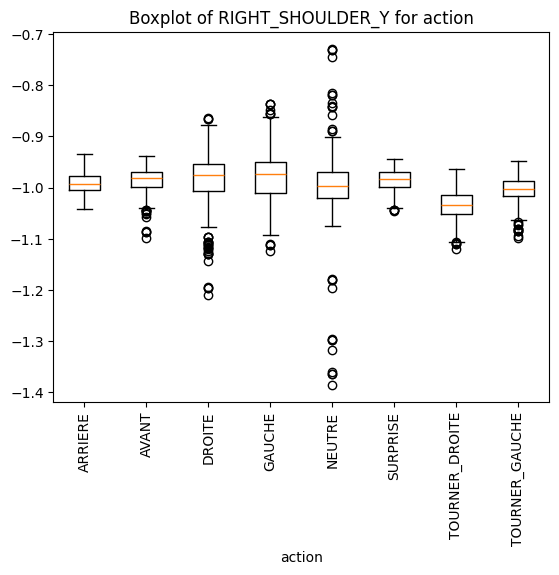

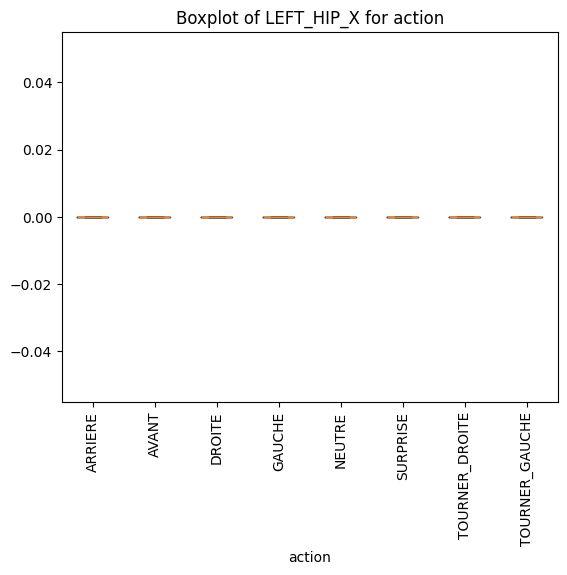

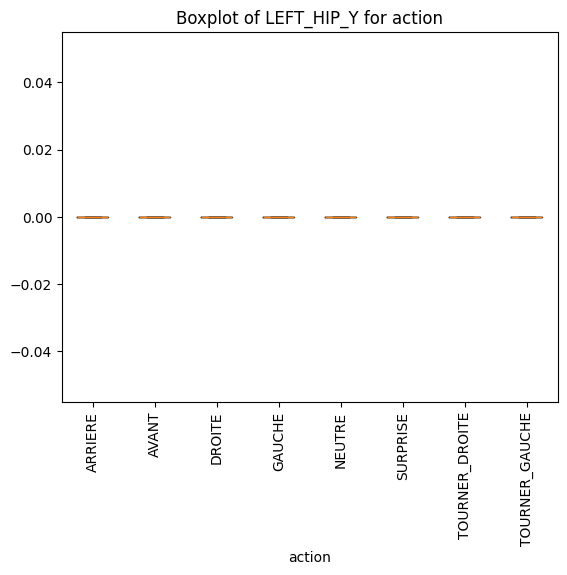

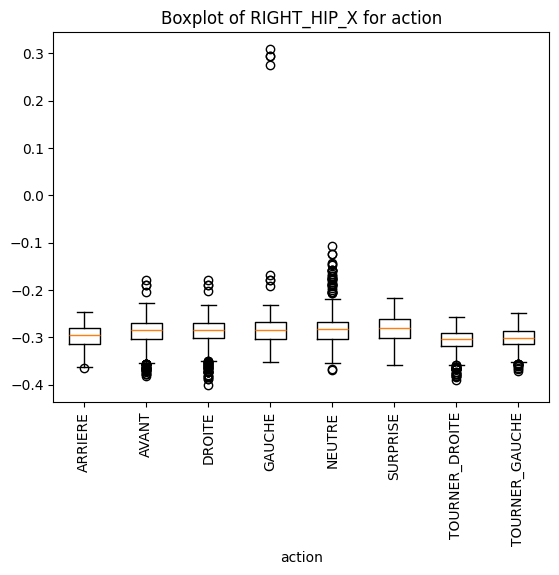

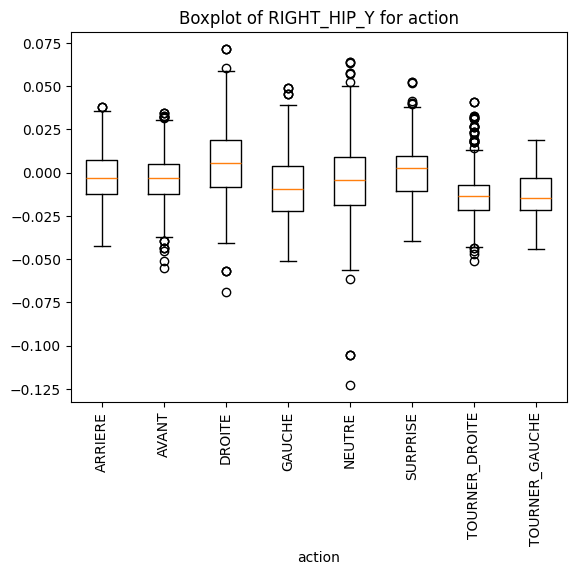

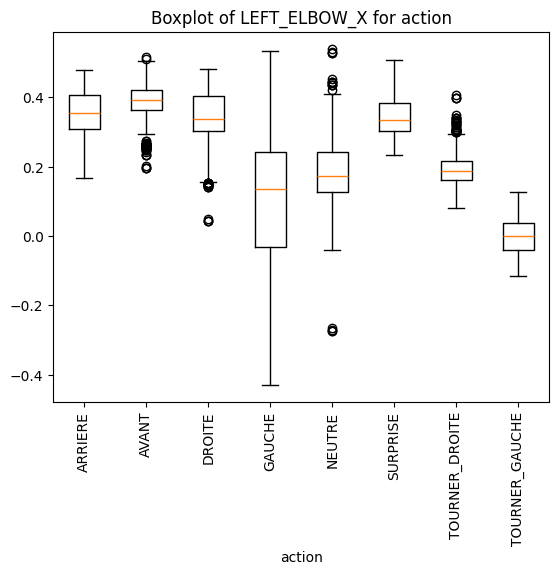

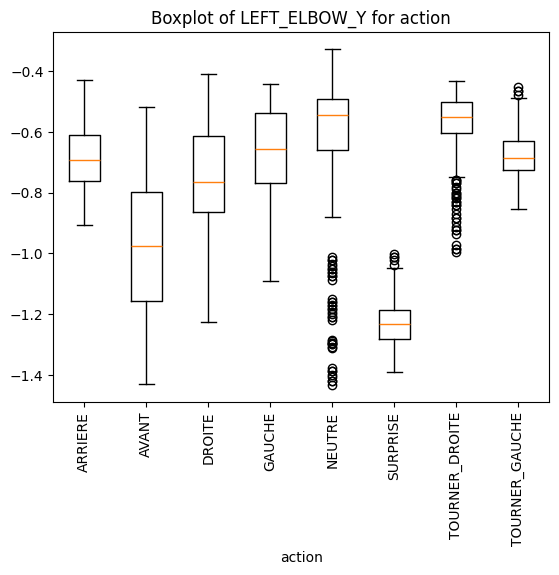

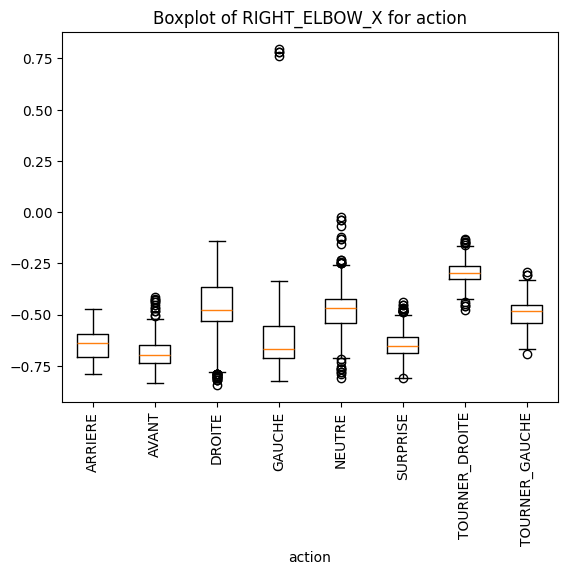

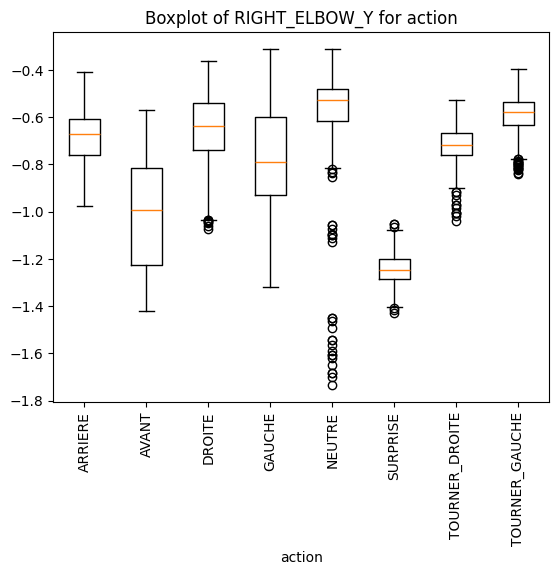

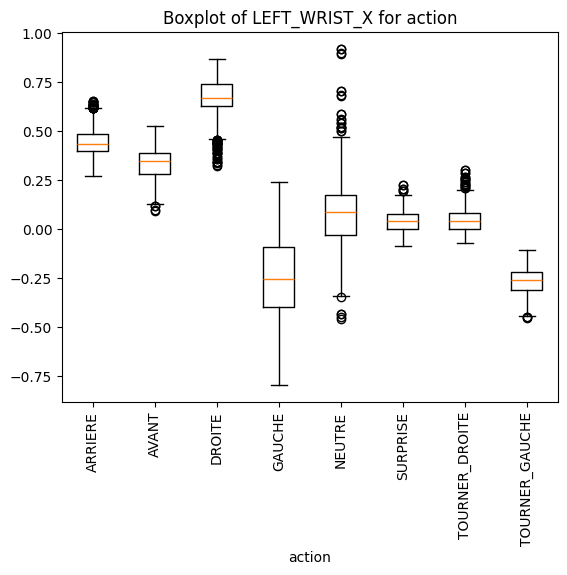

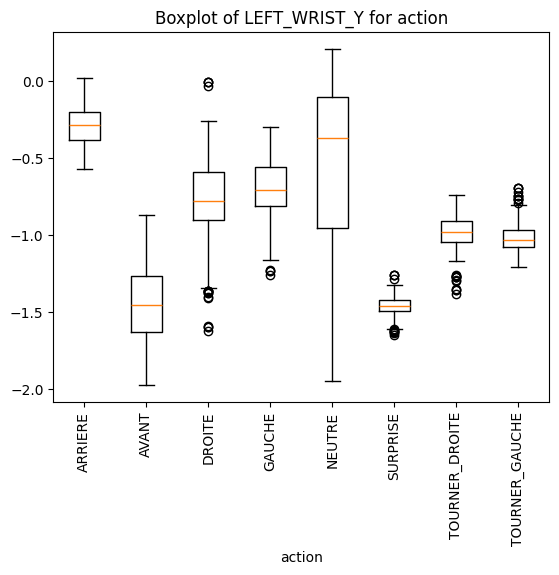

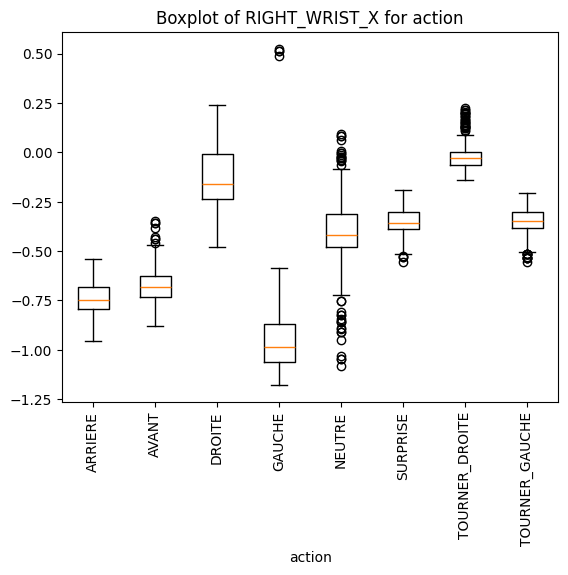

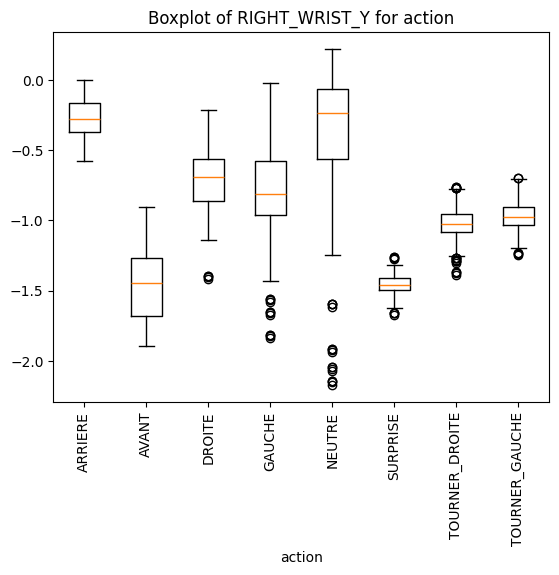

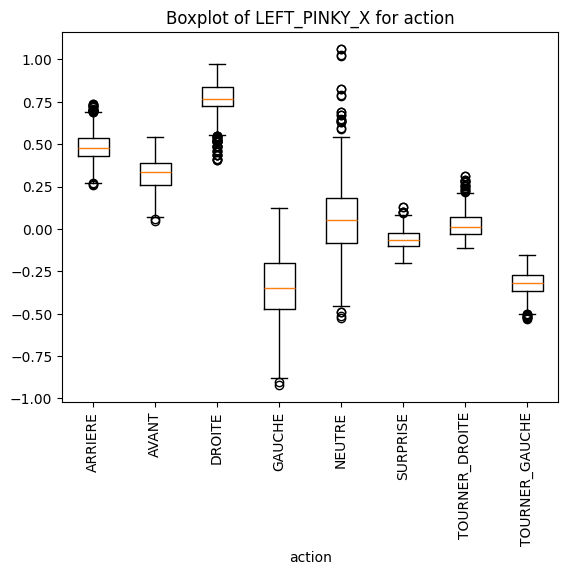

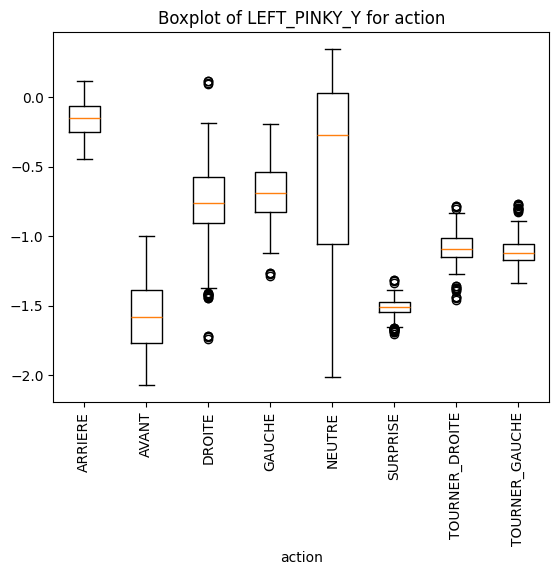

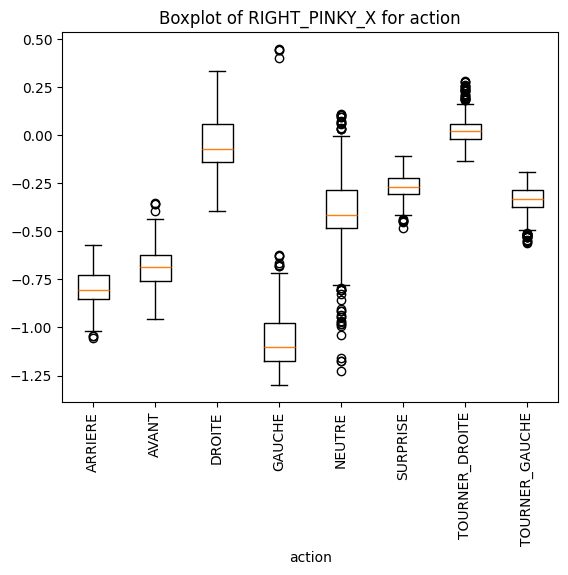

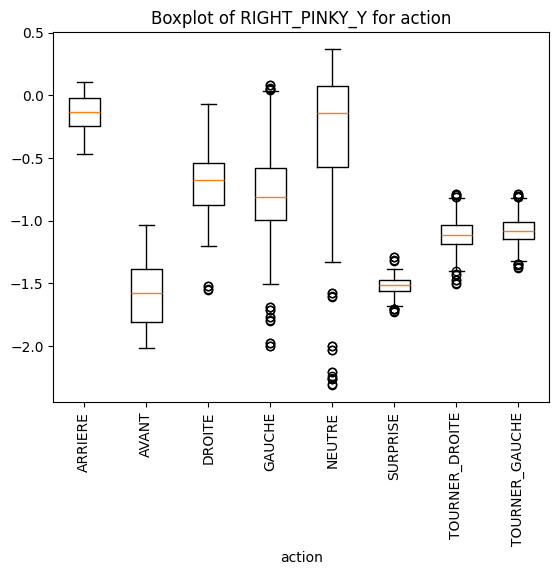

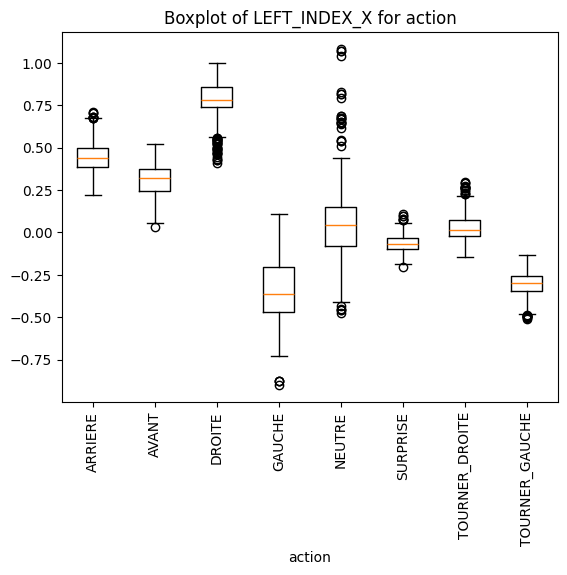

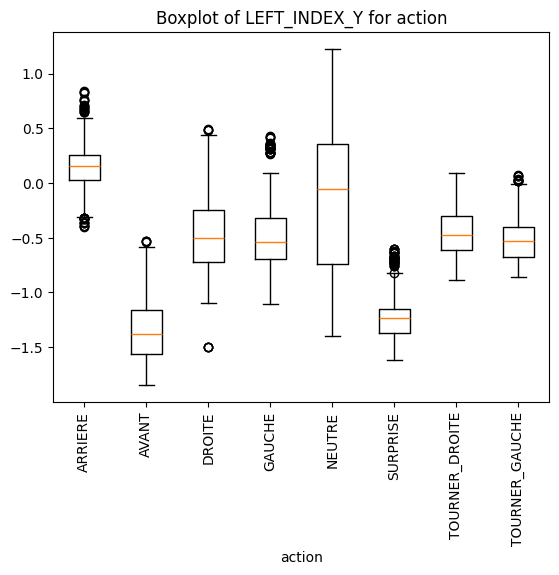

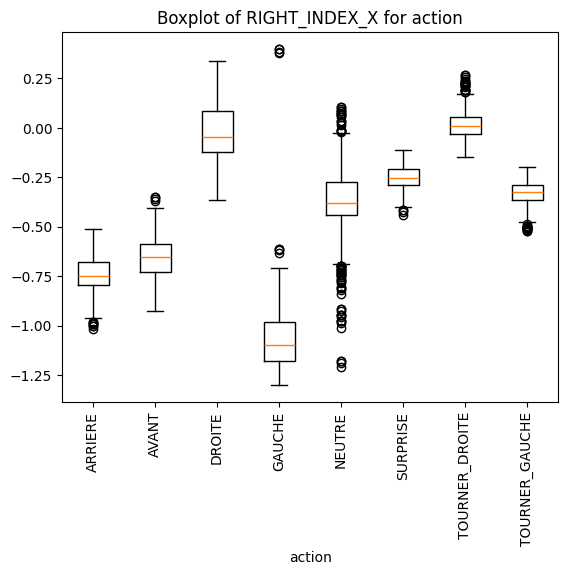

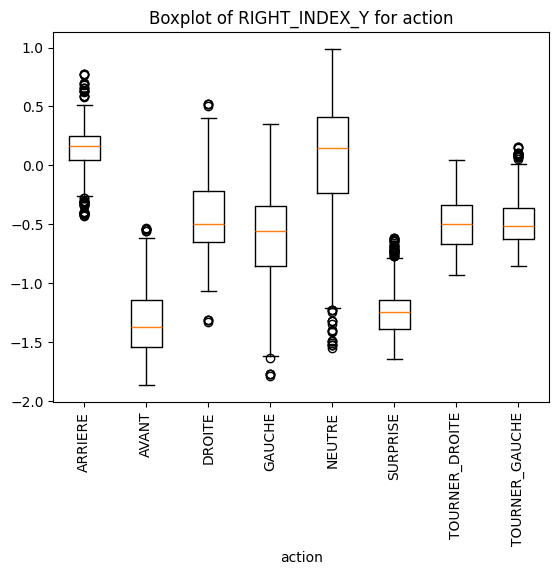

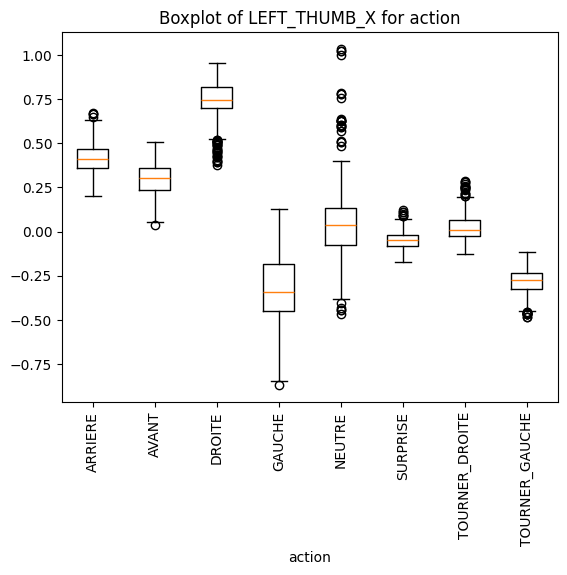

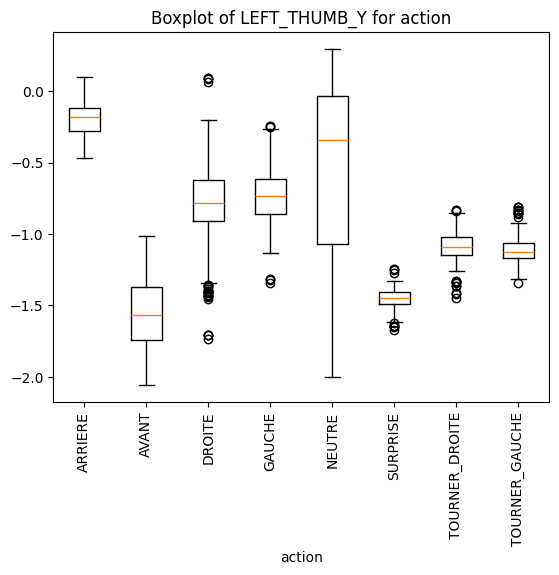

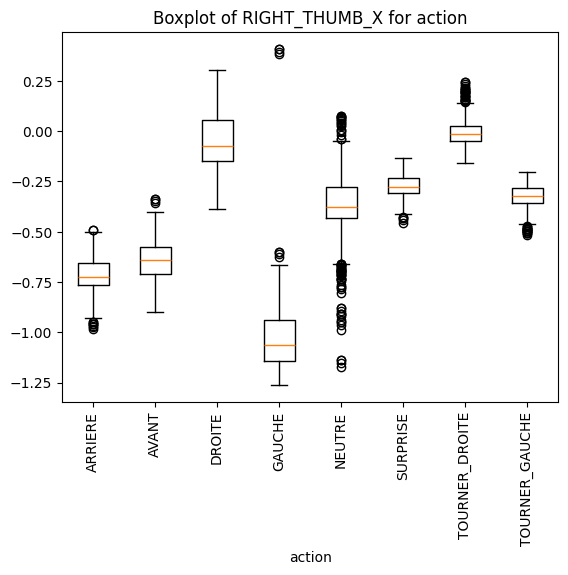

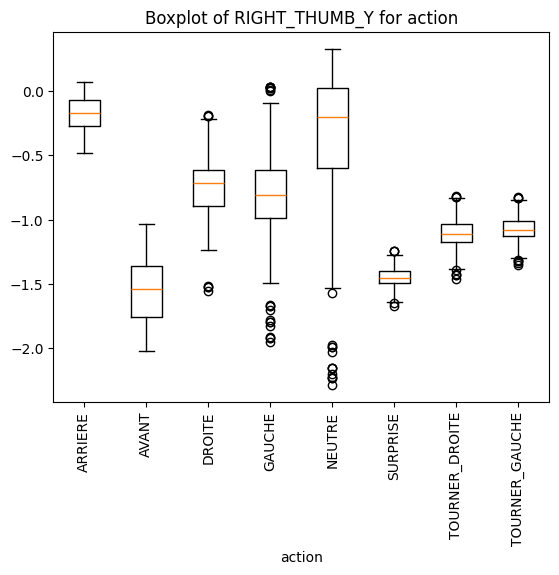

In [23]:
boxplot(df_move_normalize_filter, "action")

Nous pouvons constater qu'il existe des différences importantes en fonction des classes, notamment pour les points des mains, des coudes, et des poignets. Cela semble plutôt prometteur pour les entraînements.

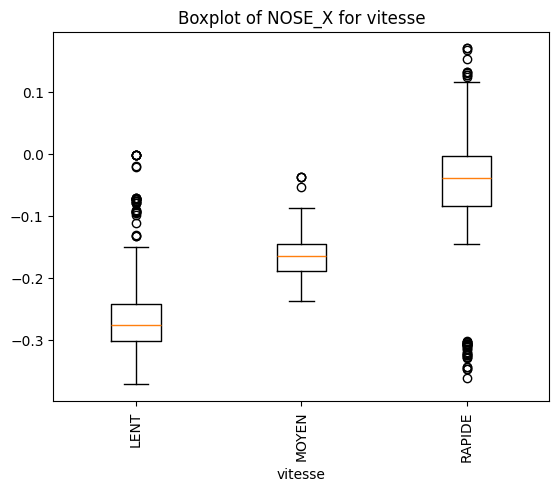

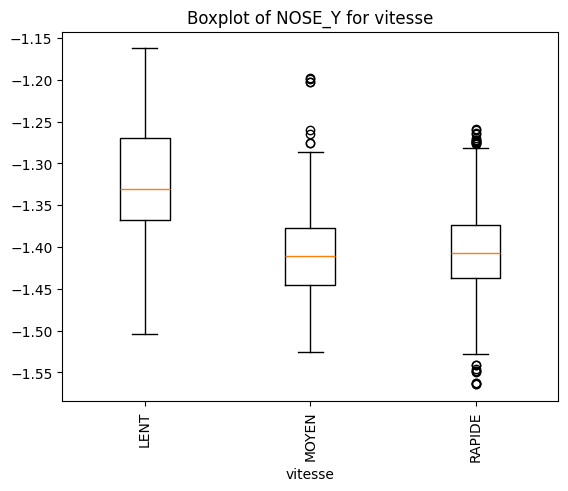

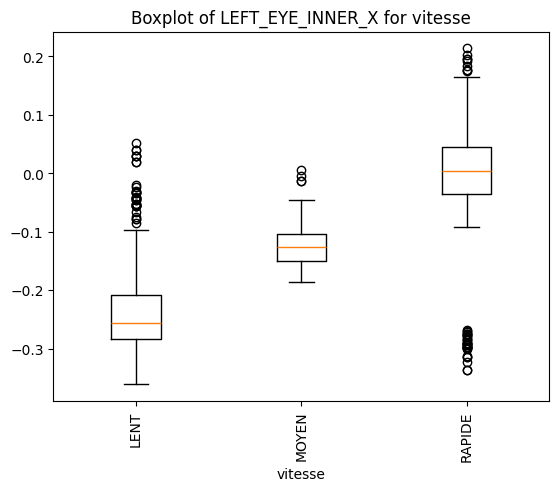

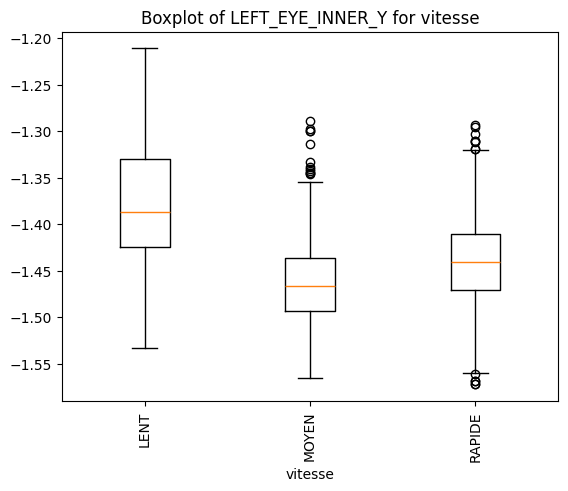

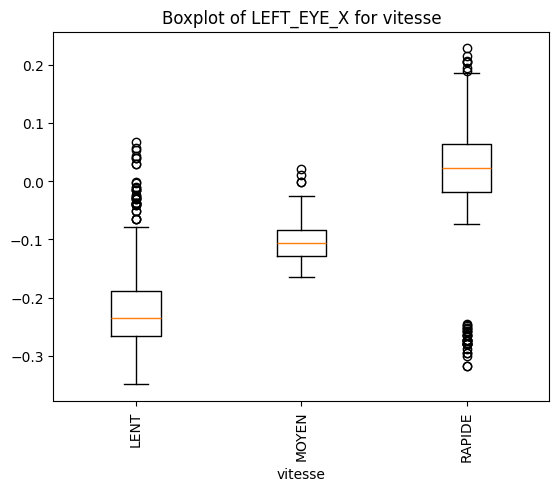

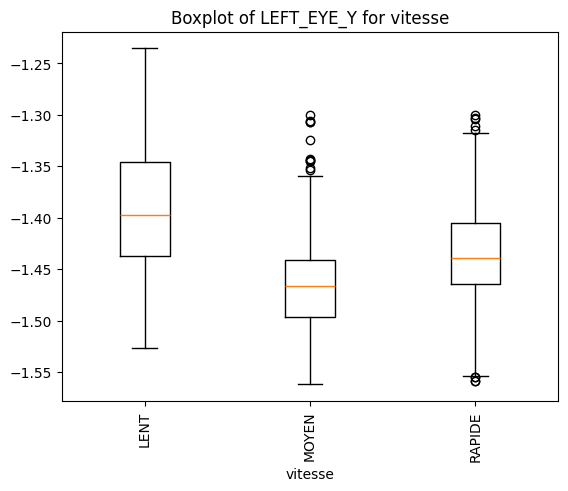

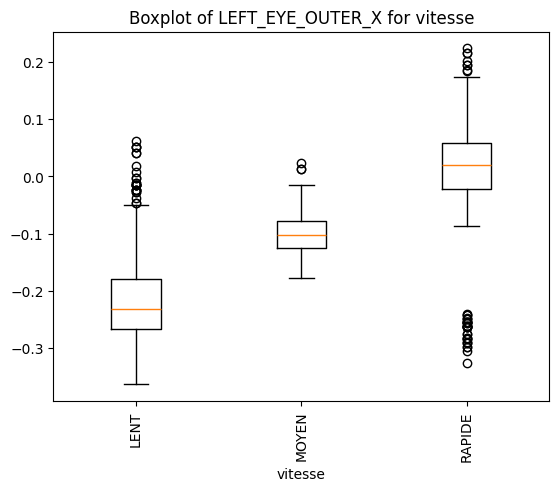

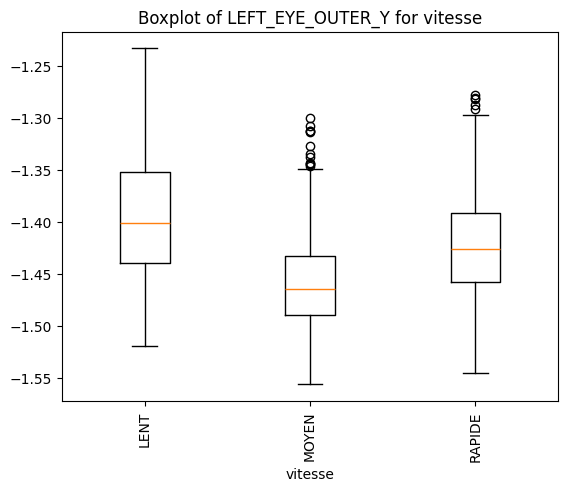

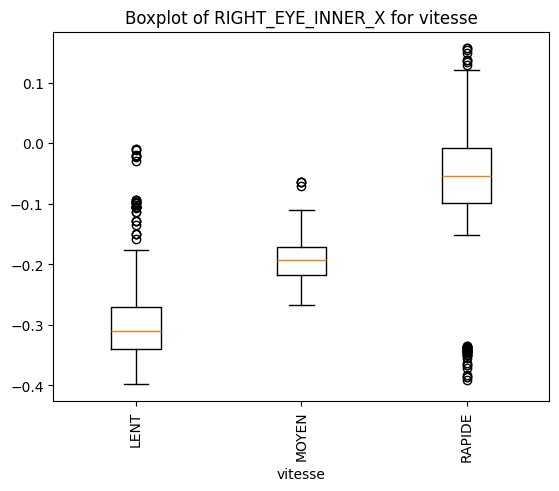

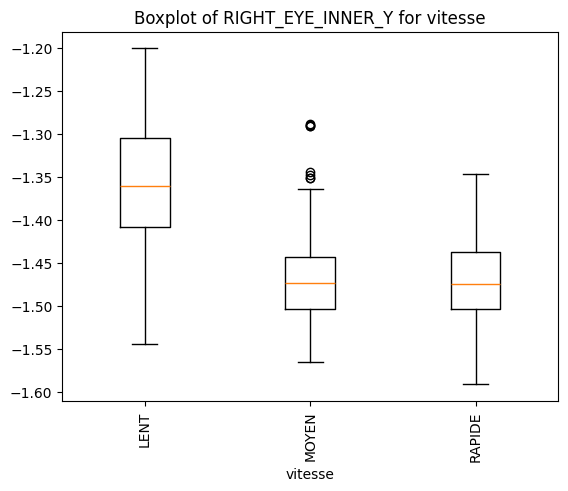

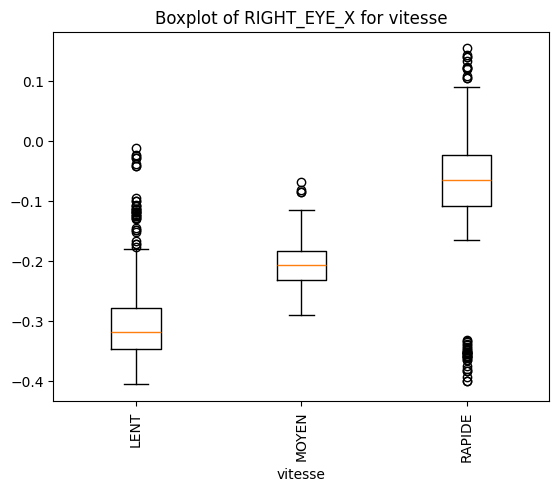

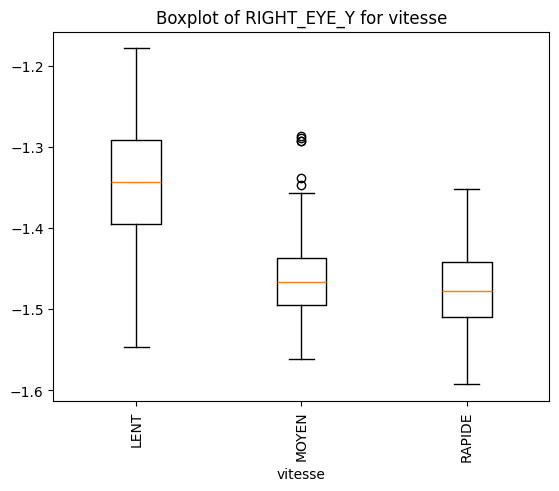

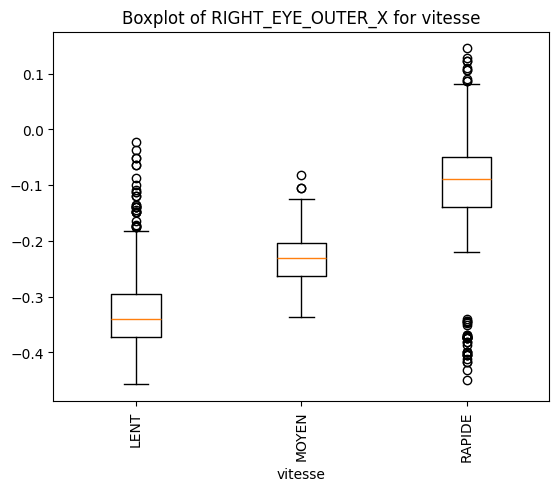

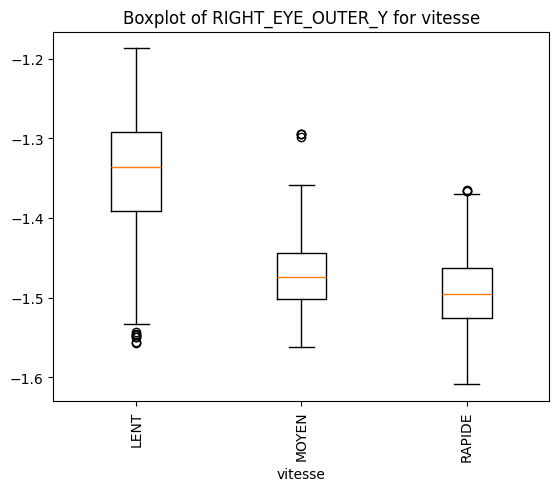

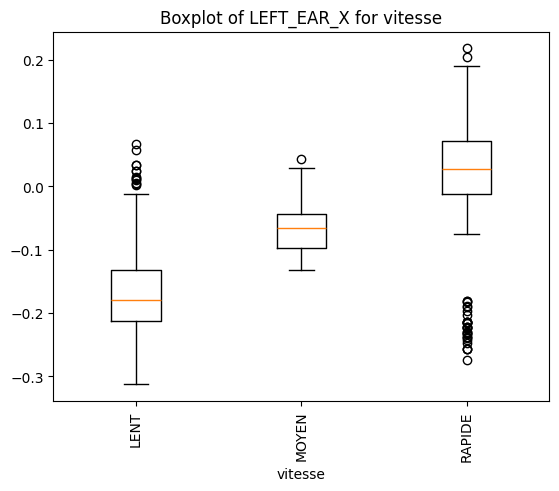

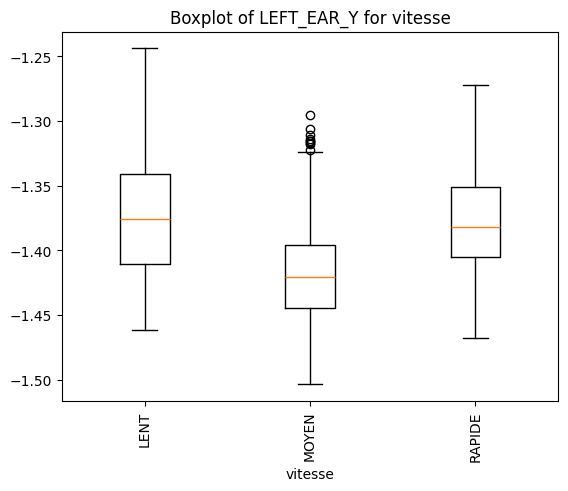

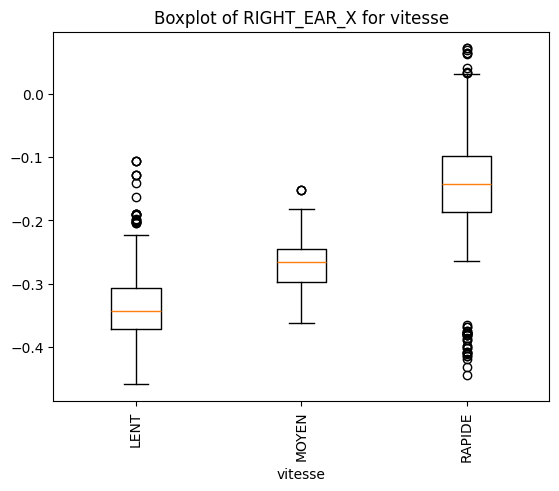

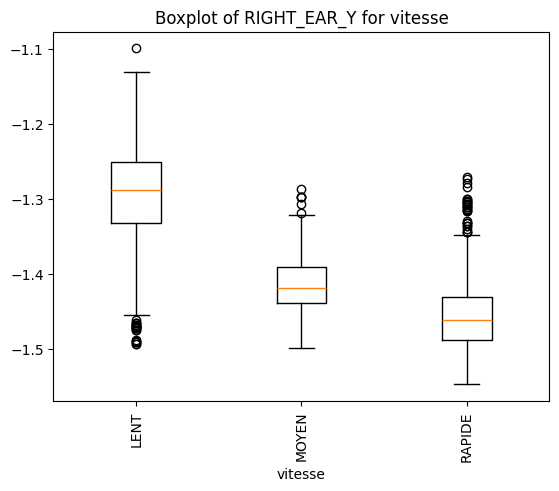

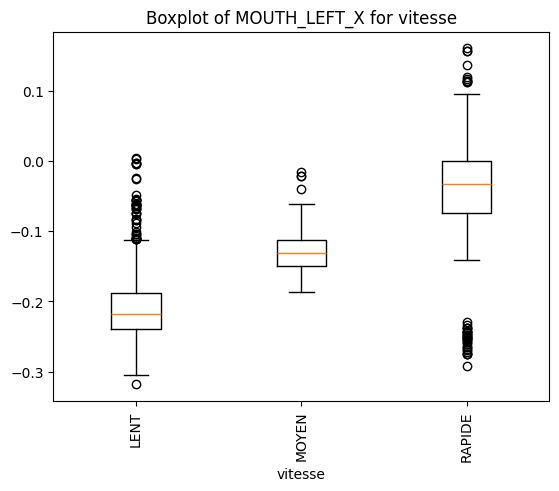

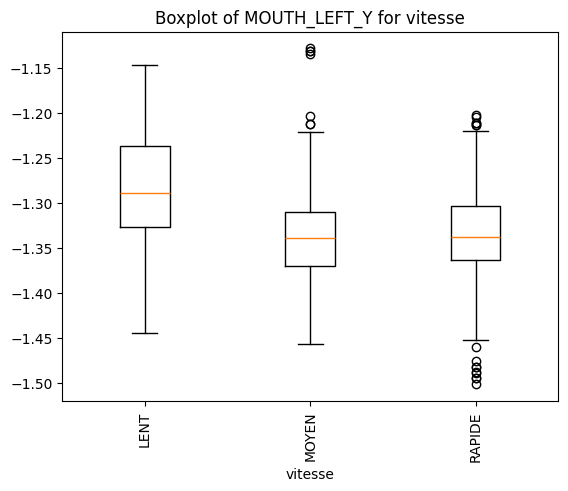

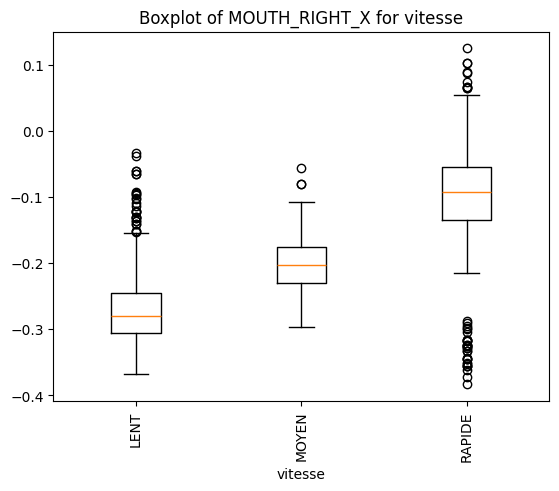

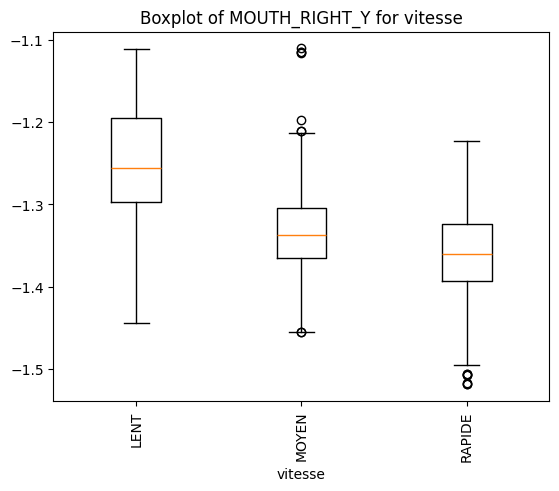

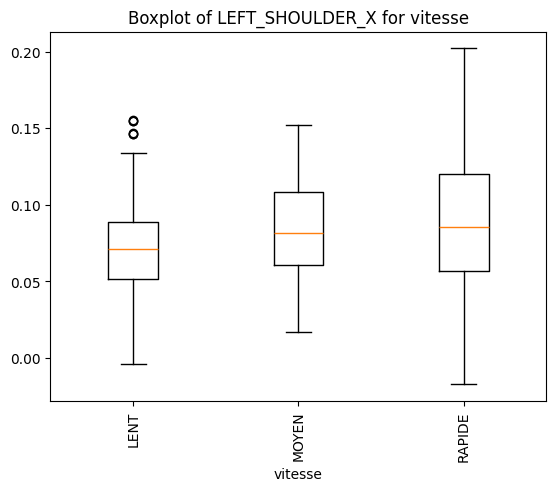

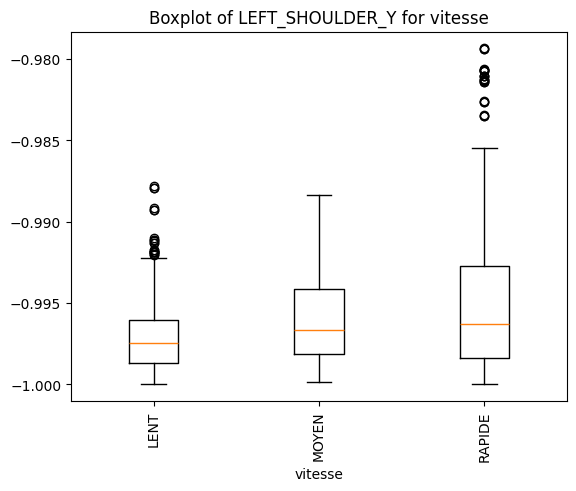

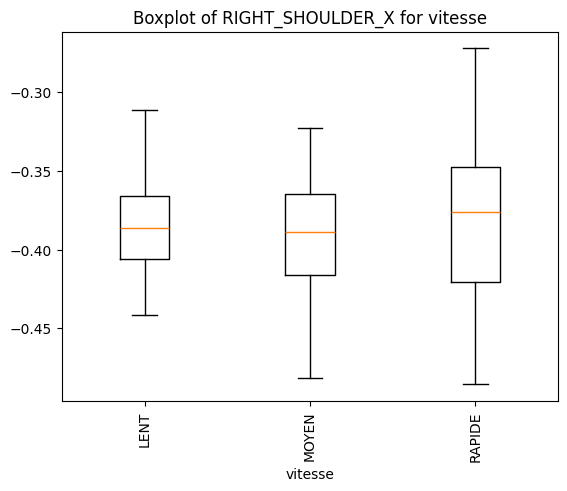

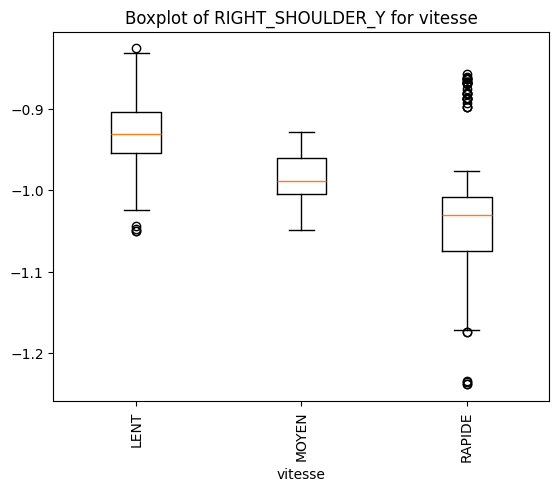

In [24]:
boxplot(df_speed_normalize_filter, "vitesse")

Nous voyons également des différences qui semblent assez marquées entre certains points, notamment au niveau des yeux, au niveau du nez, des oreilles.

### Correlation matrix

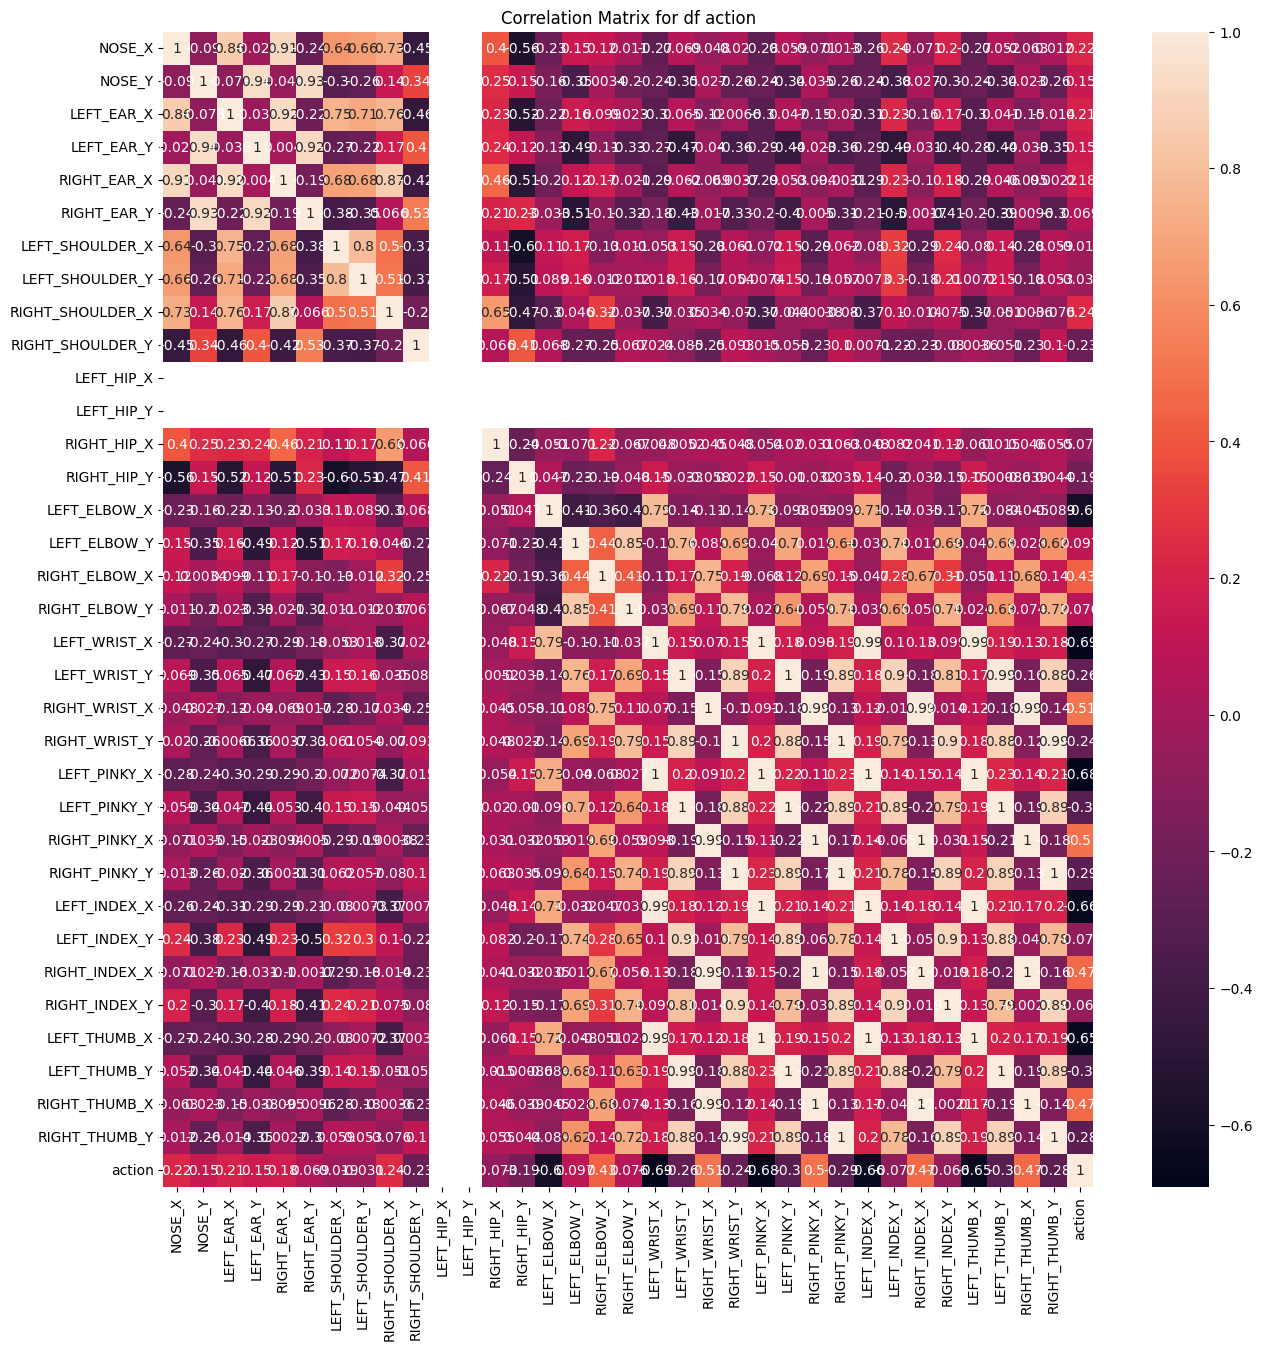

In [25]:
heatmap(df_move_normalize_filter, "action")

Nous pouvons voir d'importances corrélations entre les actions, et les points des différents doigts, des poignets, et des coudes. Les corrélations sont plus fortes en coordonnnées X.

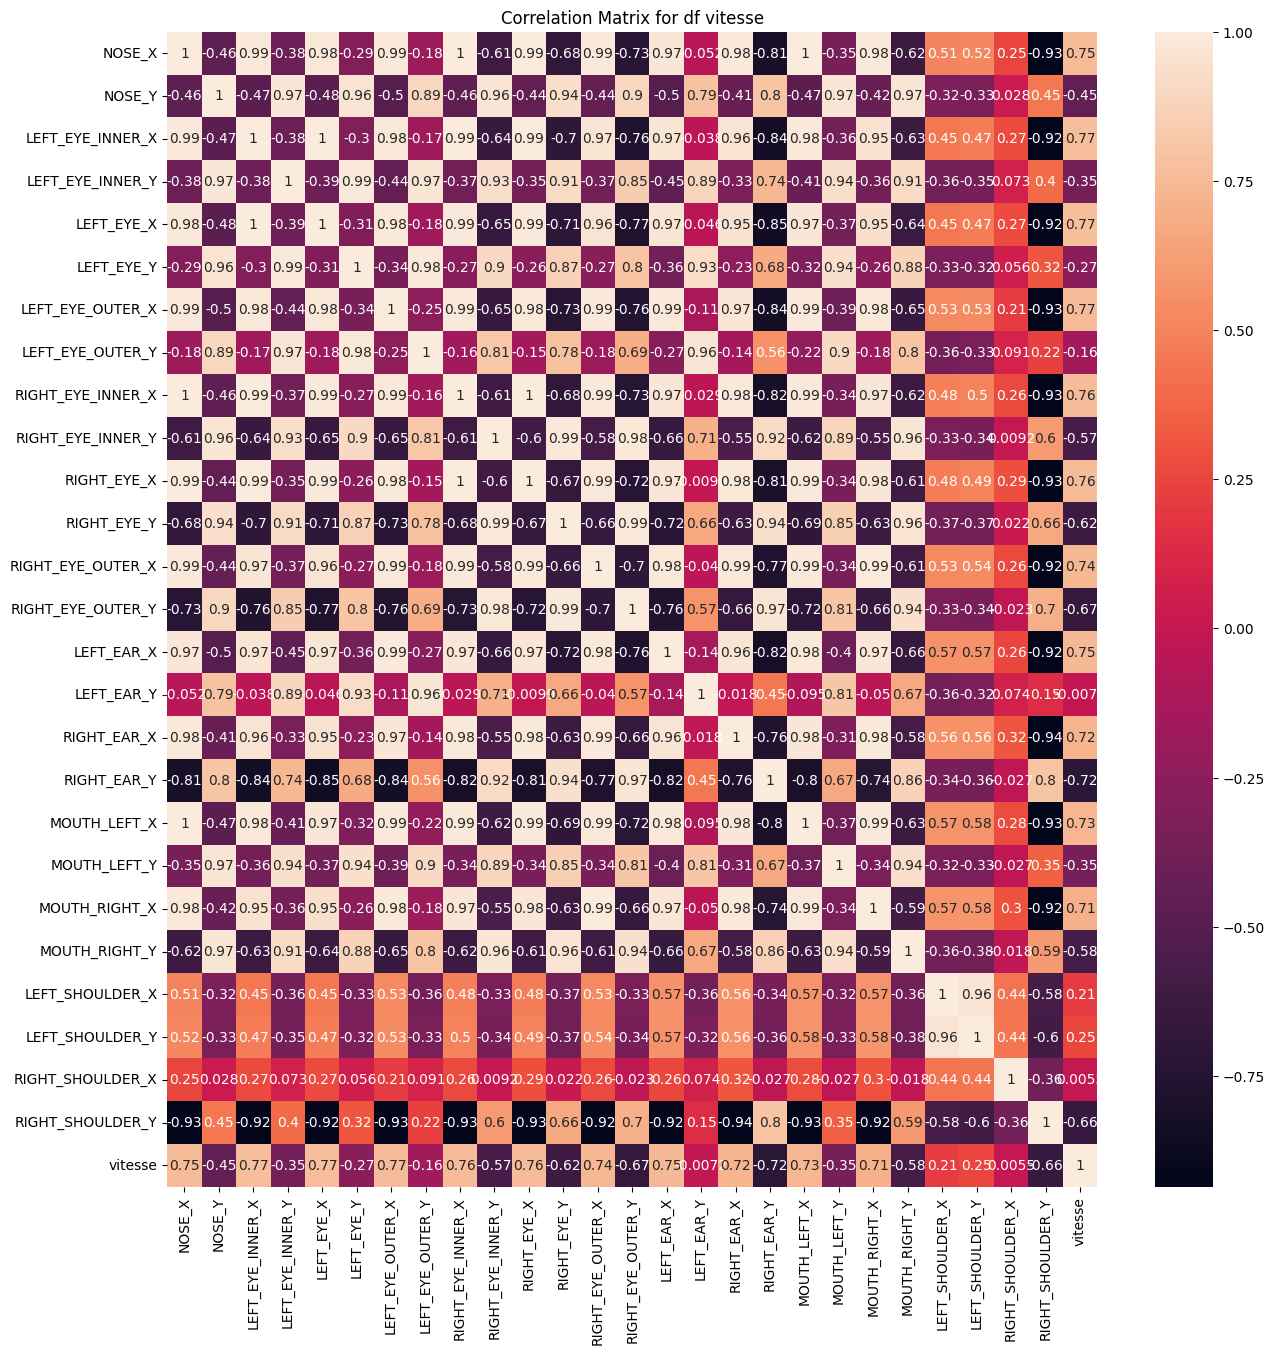

In [26]:
heatmap(df_speed_normalize_filter, "vitesse")

Les corrélations sont globalement assez hautes, sauf pour quelques points comme l'oreille gaiche, l'épaule droite en x, et l'épaule gauche, et l'oeil gauche.

## PCA

### Remove target from features

In [27]:
X_speed = df_speed_normalize_filter.drop("vitesse", axis=1)
X_move = df_move_normalize_filter.drop("action", axis=1)

Nous commençons par retirer les annotations afin qu'elles ne soient pas dans le PCA.

### Scatter matrix of components

In [28]:
scatter_matrix(df_move_normalize_filter, "action", *X_move.columns)

Les classes semblent bien distinctes entre la première et la seconde composante, ainsi qu'entre la seconde et la troisième composante. Entre la troisième et la seconde composantes, quelques classes semblent se distringuer des autres, notamment arrière, qui est autrement difficile à discrimner de neutre, ainsi que tourner droite et surprise qui se discriminent mieux entre la première et la troisième composante. La composante 4 aide pas spécialement à discriminer quoi que ce soit.

In [29]:
scatter_matrix(df_speed_normalize_filter, "vitesse", *X_speed.columns)

Globalement, les classes se discriminent pas trop mal entre les deux premières composantes. la composante 2 et 3 confondent encore plus les classes, tout comme la composante 4. Globalement, la composante 1 semble être la plus discriminante.

### Elbow method

Nous utilisons la méthode du coude, pour savoir à partir de combien de composantes la proportion de variable expliquées n'augmentent plus vraiment, et atteint un pallier.

In [30]:
from IA.exploration_data.data_viz import elbow_method

elbow_method(X_speed)

In [31]:
elbow_method(X_move)

La méthode du coude nous indique que 2 composantes principales sont suffisantes pour la vitesse et 3 pour le mouvement.

Appliquons le PCA sur les deux dataframes.

### Visualisation du PCA sur les deux dataframes

In [41]:
visualize_pca(df_move_normalize_filter, 3, "action", *X_move.columns)

Pour le coup, le PCA est bien interprétable, nous voyons assez clairement qu'une dimension correspond à l'axe des X, qu'une dimension correspond à l'axe des y, et que la dernière dimension correspond aux membres de droites, et aux membres de gauche. Nous constatons également que certaines features ne contribuent pas spécialement à l'explication de la variance, comme par exemple les features liées aux épaules, et ceux du visage. Cela pourrait être pertinent de les retirer.

In [42]:
visualize_pca(df_speed_normalize_filter, 2, "vitesse", *X_speed.columns)

Concernant les points gardés pour contrôler la vitesse du robot, beaucoup des points sont importants. Nous retrouvons une composante qui correspond au X, et une composante qui correspond Y. Nous constatons également que les épaules des épaules droite et gauches (sauf pour l'épaule gauche en y), qui semble avoir une importance comparée aux autres points des épaules.

### Potentielle utilisation des composantes dans le modèle

In [34]:
speed_pca, loadings_speed, _ = pca(df_speed_normalize_filter.drop("vitesse", axis=1), nb_components=2)

df_speed_normalize_filter_pca = pd.DataFrame(speed_pca, columns=["PC1", "PC2"])

df_speed_normalize_filter_pca["vitesse"] = df_speed_normalize_filter["vitesse"].reset_index(drop=True)

In [35]:
move_pca, loadings_move, _ = pca(df_move_normalize_filter.drop("action", axis=1), nb_components=3)

df_move_normalize_filter_pca = pd.DataFrame(move_pca, columns=["PC1", "PC2", "PC3"])

df_move_normalize_filter_pca["action"] = df_move_normalize_filter["action"].reset_index(drop=True)

In [36]:
df_speed_normalize_filter_pca.sample(10)

PC1       PC2 vitesse
549  0.220952 -0.097704  RAPIDE
864 -0.094650 -0.201709    LENT
68  -0.224806 -0.085841    LENT
855  0.261838  0.057226  RAPIDE
3   -0.539593  0.018050    LENT
228  0.296509  0.405426  RAPIDE
165 -0.096343 -0.077748   MOYEN
879 -0.662164  0.225386    LENT
665 -0.610560  0.171502    LENT
947 -0.443146  0.162468    LENT

In [37]:
df_move_normalize_filter_pca.sample(10)

PC1       PC2       PC3          action
1062 -1.176615  0.198935 -0.866968           AVANT
835  -0.506192 -0.349567  0.788563  TOURNER_GAUCHE
2242  0.050658 -1.599413 -0.414396          GAUCHE
3637 -0.548061 -0.712085  0.667073  TOURNER_GAUCHE
1857  0.205046 -0.430223  0.767258  TOURNER_GAUCHE
3427 -1.789176  0.017855  0.101406        SURPRISE
3636 -0.582383 -0.735087  0.648987  TOURNER_GAUCHE
2327  1.550392 -0.118984  0.138051          NEUTRE
1194  0.197548  1.647895 -0.613858          DROITE
1733 -0.532386  1.026255  0.874825  TOURNER_DROITE

Nous avons essayé d'utiliser les composantes directement dans les modèles, puisque nous étions en mesure des les interpréter. Cependant, si nous avions gagné en temps de calcul, les performances étaient moins bonnes qu'avec les features intactes.

### Sauvegarde des dataframes

Nous allons conserver une version avec PCA et une version sans PCA pour les tester ensuite et voir si le PCA apporte un gain de performance.

In [38]:
dossier = 'preprocessing_data'

os.makedirs(dossier, exist_ok=True)

chemin_fichier = os.path.join(dossier, 'move_preprocess.csv')
df_move_normalize_filter.to_csv(chemin_fichier, index=False)

chemin_fichier = os.path.join(dossier, 'move_preprocess_pca.csv')
df_move_normalize_filter_pca.to_csv(chemin_fichier, index=False)

chemin_fichier = os.path.join(dossier, 'speed_preprocess.csv')
df_speed_normalize_filter.to_csv(chemin_fichier, index=False)

chemin_fichier = os.path.join(dossier, 'speed_preprocess_pca.csv')
df_speed_normalize_filter_pca.to_csv(chemin_fichier, index=False)

print(f"Fichiers sauvegardés dans : {dossier}")

Fichiers sauvegardés dans : preprocessing_data
